# Why are they best and most experienced employees leaving?

## Analyzing Employee Attrition for a Company

**Author: Natalija Stojchevska**

<img src="data/EmployeeAttritionImage.jpg" alt="Image" style="width: 100%; height: auto; max-height: 550px;">

<div style="float: right;">
        <a href="https://helpjuice.com/blog/employee-attrition" target="_blank">Image Source</a>
</div>

## **Abstract**

The Employee Attrition project combines **exploratory data analysis** (EDA) techniques with **predictive modeling** to gain insights into employee turnover within an organization. The project utilizes the dataset [**IBM HR Analytics Employee Attrition & Performance Dataset**](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/code) that contains various employee attributes, such as age, job role, salary, performance ratings, and more. 

The EDA phase involves thoroughly exploring and visualizing the data to uncover patterns, trends, and potential factors influencing attrition. Descriptive statistics, correlation analysis, and data visualization techniques are employed to understand the distribution of variables, identify potential predictors of attrition, and discover relationships between variables.

The EDA findings serve as a foundation for the subsequent predictive modeling phase, where machine learning algorithms such as **Random Forest**, **XGBoost**, and **LightGBM** are implemented. These models are trained on the dataset, taking into account the identified significant features from the EDA phase. Performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score are utilized to evaluate the models' predictive capabilities.

By combining EDA with predictive modeling, this project aims to provide valuable insights into the factors driving employee attrition. The results can assist organizations in understanding the key determinants of attrition, facilitating the development of targeted strategies to mitigate employee turnover. Ultimately, the project's objective is to enable proactive measures to improve employee retention, enhance organizational performance, and create a more productive and satisfied workforce.

## **Used libraries**

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import researchpy as rp

import warnings

from scipy.stats import chi2_contingency 

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import MinMaxScaler

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, roc_auc_score
from tabulate import tabulate

from sklearn.model_selection import GridSearchCV

In [3]:
# Define custom colors for the palette
custom_palette = ["#2b68de", "#2bdea1"]

# Set the custom palette in seaborn
sns.set_palette(custom_palette)

## **1. Data**

### 1.1. IBM HR Analytics Employee Attrition & Performance Data Set

The IBM HR Analytics Employee Attrition & Performance Dataset is a fictitious dataset created by IBM data scientists. This dataset is intended for research purposes and uncovering factors that lead to employee attrition or building machine learning models to predict employee attrition.

<details>
    
<summary><span style="cursor: pointer; text-decoration: underline; color: blue;">Click to expand/collapse the description of the columns</span></summary>

The IBM HR Analytics Employee Attrition & Performance Dataset contains various features or columns, which are described below:

**Age**: The age of the employee.

**Attrition**: Indicates if the employee has left the company or not (Yes/No).

**BusinessTravel**: The frequency of employee travel related to their work.

**DailyRate**: The amount of money paid to an employee for a day's work.

**Department**: The department in which the employee works.

**DistanceFromHome**: The distance between the employee's workplace and their home.

**Education**: The highest level of education completed by the employee. (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)

**EducationField**: The field in which the employee received their education.

**EmployeeCount**: The number of employees with the same job role and department as the employee being analyzed. 

**EmployeeNumber**: A unique identifier for each employee.

**EnvironmentSatisfaction**: The employee's satisfaction with their work environment (1-4).

**Gender**: The gender of the employee.

**HourlyRate**: The amount of money paid to an employee for an hour's work.

**JobInvolvement**: The employee's level of involvement in their job (1-4).

**JobLevel**: The level of the employee's job within the company.

**JobRole**: The role of the employee within the company.

**JobSatisfaction**: The employee's satisfaction with their job (1-4).

**MaritalStatus**: The marital status of the employee.

**MonthlyIncome**: The monthly salary earned by the employee.

**MonthlyRate**: The amount of money paid to the employee per month.

**NumCompaniesWorked**: The number of companies the employee has worked for in the past.

**Over18**: Whether the employee is over 18.

**OverTime**: Indicates if the employee works overtime or not (Yes/No).

**PercentSalaryHike**: Contains the percentage increase in salary for each employee from the previous year.

**PerformanceRating**: The employee's performance rating (1-4).

**RelationshipSatisfaction**: The employee's satisfaction with their work relationships (1-4).

**StandardHours**: The standard number of working hours for the employee.

**StockOptionLevel**: The level of stock options awarded to the employee.

**TotalWorkingYears**: The total number of years the employee has worked.

**TrainingTimesLastYear**: The number of times the employee received training last year.

**WorkLifeBalance**: The employee's work-life balance satisfaction (1-4).

**YearsAtCompany**: The number of years the employee has worked at the company.

**YearsInCurrentRole**: The number of years the employee has been in their current role.

**YearsSinceLastPromotion**: The number of years since the employee's last promotion.

**YearsWithCurrManager**: The number of years the employee has been working under their current manager.

</details>


In [4]:
ibm_data = pd.read_csv("data/ibm_hr_employee_attrition.csv")

In [5]:
pd.options.display.max_columns = 100 # to avoid truncated output
ibm_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
ibm_data.shape

(1470, 35)

In [7]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**comment**: on the "IBM HR Analytics Employee Attrition & Performance" Dataset

The dataset has 1470 rows and 35 columns
35 columns comprise of 26 numerical variables and 9 categorical variables

## 2. Data Tidying and Cleaning

### 2.1. Duplicates

In [8]:
# Select the key columns for checking duplicates
key_columns = ["EmployeeNumber", "Attrition", "Age", "Gender", "JobRole", "Department", "YearsAtCompany"]

# Check for duplicates
ibm_data[ibm_data.duplicated(subset=key_columns, keep=False)].sum()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

### 2.2. Missing values

In [9]:
print(f"total number of missing values by attribute:\n{ibm_data.isnull().sum()}")

total number of missing values by attribute:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany           

In [10]:
print(f"total number of missing values in the entire DataFrame: {ibm_data.isnull().sum().sum()}")

total number of missing values in the entire DataFrame: 0


### 2.4. Removing Redundant or Constant Columns

In [11]:
ibm_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
ibm_data["Over18"].unique()

array(['Y'], dtype=object)

In [13]:
ibm_data["EmployeeCount"].unique()

array([1], dtype=int64)

In [14]:
ibm_data["StandardHours"].unique()

array([80], dtype=int64)

In [15]:
ibm_data["PerformanceRating"].unique()

array([3, 4], dtype=int64)

**Insights:**

The following columns are "no use" variables; they do not add value to the predictive model that I am going to build:

EmployeeNumber (1470 unique values)

EmployeeCount (only 1 unique value)

Over18 (only 1 unique value)

StandardHours (only 1 unique value)

PerformanceRating (only 2 unique values) and there is no correlation to the tarvet variable Attrition

**Action**: drop these 5 columns

In [16]:
ibm_data = ibm_data.drop(columns = ["Over18", "EmployeeCount", "StandardHours", "EmployeeNumber", "PerformanceRating"])

In [17]:
ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,2


In [18]:
ibm_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 2.3. Handling data type issues

In [19]:
ibm_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

**Insights**: The Attrition column is currently of object data type. In order to use this column as a target variable for the modeling, it needs to be converted to a numeric data type such as integer.

**Action**: Convert Attriction values to integer. Yes -> 1, No -> 0 and save them in another column

In [20]:
ibm_data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [21]:
ibm_data["Attrition_int"] = (ibm_data["Attrition"] == "Yes").astype(int)

In [22]:
ibm_data["Attrition_int"].value_counts()

0    1233
1     237
Name: Attrition_int, dtype: int64

**Insights:** 

There are several columns in the data that have numeric values that represent categories, like Education that has values of 1 through 5 representing different levels of education. These columns will be added to a list and the list will lather be used to perform significance testing for feature selection.

In [23]:
CAT_COLS = []
for i in ibm_data.columns:
    if ibm_data[i].nunique() <= 5 or ibm_data[i].dtype == object:
        CAT_COLS.append(i)

In [24]:
CAT_COLS

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'Attrition_int']

## 3. Exploratory Data Analysis

### 3.1. Data Understanding

In [25]:
# include only the numerical columns
ibm_data.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


**Insights:**

**Age**: The average age of employees in the dataset is approximately 37 years, with a standard deviation of 9 years. The age ranges from 18 to 60. This information can be used to analyze if there are any age-related patterns or trends in employee attrition.

**Monthly Income**: The average monthly income of employees is around 6,503 USD, with a standard deviation of 4,708 USD. The minimum and maximum incomes are 1,009 USD and 19,999 USD, respectively. Comparing the income levels between employees who have left the company (attrition) and those who have stayed may provide insights into the potential impact of income on attrition.

**Job Level**: The dataset includes employees with job levels ranging from 1 to 5. Understanding the distribution of job levels can help identify if there is any correlation between job level and attrition. For example, higher job levels might have lower attrition rates due to increased job stability or better opportunities for growth.

**Years at Company**: The average number of years employees have been with the company is approximately 7. This information can be used to analyze if there is a relationship between employee tenure and attrition. For instance, employees who have been with the company for a longer time might be less likely to leave.

**Education**: The education level of employees ranges from 1 to 5, with 1 being the lowest level and 5 being the highest. Analyzing the relationship between education level and attrition can provide insights into whether higher education is associated with higher job satisfaction and lower attrition.

In [26]:
# include only the categorical columns
ibm_data.describe(include="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [27]:
#1. 'BusinessTravel'
print("unique values for BusinessTravel:", ibm_data["BusinessTravel"].unique())

unique values for BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [28]:
#2. 'Department'
print("unique values for Department:", ibm_data["Department"].unique())

unique values for Department: ['Sales' 'Research & Development' 'Human Resources']


In [29]:
#3. 'EducationField'
print("unique values for EducationField:", ibm_data["EducationField"].unique())

unique values for EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


In [30]:
#4. 'Gender'
print("unique values for Gender:", ibm_data["Gender"].unique())

unique values for Gender: ['Female' 'Male']


In [31]:
#5. 'JobRole'
print("unique values for JobRole:", ibm_data["JobRole"].unique())

unique values for JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [32]:
#6. 'MaritalStatus'
print("unique values for MaritalStatus:", ibm_data["MaritalStatus"].unique())

unique values for MaritalStatus: ['Single' 'Married' 'Divorced']


In [33]:
#7. 'OverTime'
print("unique values for OverTime:", ibm_data["OverTime"].unique())

unique values for OverTime: ['Yes' 'No']


**Insights:**

**Attrition**: This variable indicates whether an employee has left the company (Yes) or not (No). 
Out of the 1470 employees in the dataset, 1233 of them did not leave the company, while 237 of them left. This indicates that the majority of employees did not leave the company.

**BusinessTravel**: This variable indicates how frequently an employee travels for business. The three categories are "Travel_Rarely", "Travel_Frequently", and "Non-Travel". The most frequent category is "Travel_Rarely", which accounts for 1043 out of 1470 employees (about 71%).

**Department**: This variable indicates the department in which the employee works. The three categories are "Sales", "Research & Development", and "Human Resources". The most common department is "Research & Development", which accounts for 961 out of 1470 employees (about 65%).

**EducationField**: This variable indicates the field of education of the employee. The six categories are "Life Sciences", "Medical", "Marketing", "Technical Degree", "Other", and "Human Resources". The most common field is "Life Sciences", which accounts for 606 out of 1470 employees (about 41%).

**Gender**: This variable indicates the gender of the employee. The two categories are "Male" and "Female". The most common gender is "Male", which accounts for 882 out of 1470 employees (about 60%).

**JobRole**: This variable indicates the role of the employee in the company. The nine categories are "Sales Executive", "Research Scientist", "Laboratory Technician", "Manufacturing Director", "Healthcare Representative", "Manager", "Sales Representative", "Research Director", and "Human Resources". The most common role is "Sales Executive", which accounts for 326 out of 1470 employees (about 22%).

**MaritalStatus**: This variable indicates the marital status of the employee. The three categories are "Married", "Single", and "Divorced". The most common marital status is "Married", which accounts for 673 out of 1470 employees (about 46%).

**OverTime**: This variable indicates whether the employee works overtime or not. The two categories are "Yes" and "No". The most common category is "No", which accounts for 1054 out of 1470 employees (about 72%).

**Nominal variables**: Attrition, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime

**Ordinal variables**: BusinessTravel

**Action**: encode the categorical variables using:

* **Binary encoding** for Gender, OverTime

* **One-hot encoding** for EducationField, JobRole, Department, MaritalStatus
    
* **Ordinal encoding** for BusinessTravel

### 3.2. Distribution of all variables

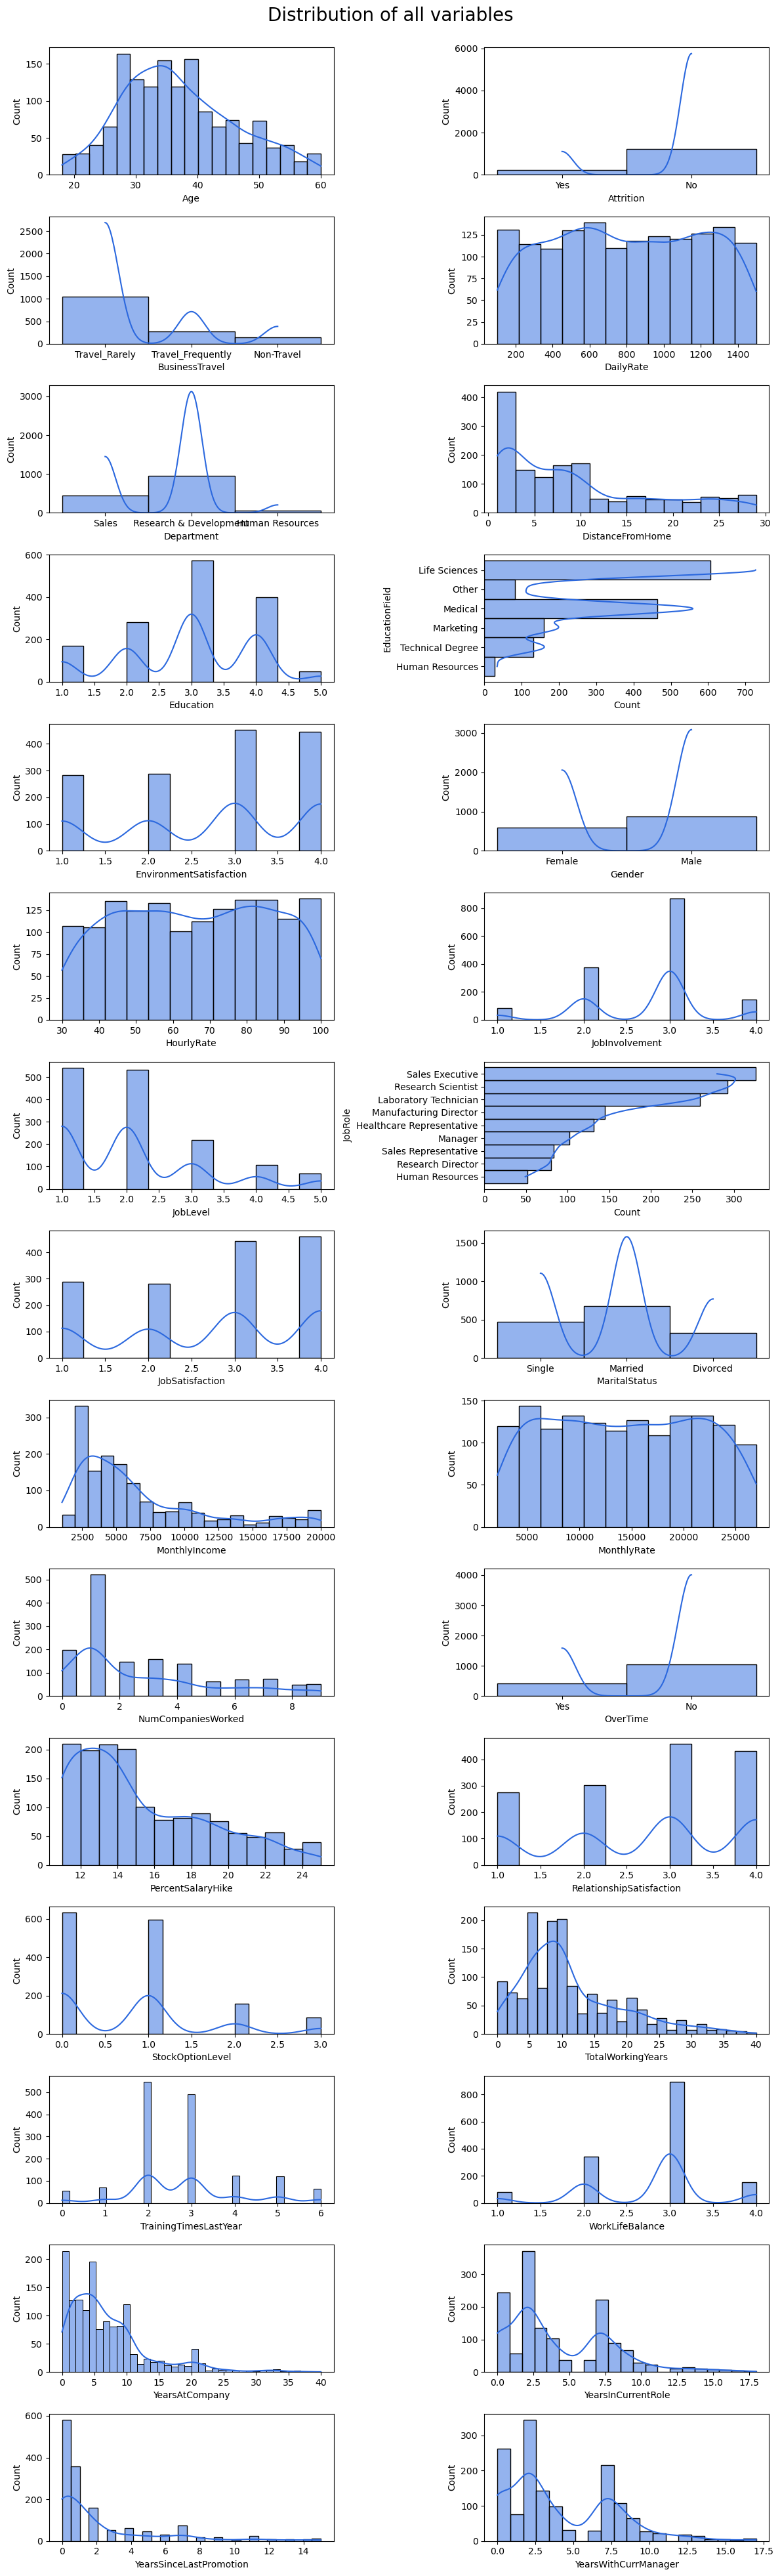

In [34]:
ncols = 2
nrows = np.ceil(len(ibm_data.columns) / ncols).astype(int)
fig, axs = plt.subplots(ncols = ncols, nrows = nrows - 1, figsize = (12, nrows * 2.5))

for c, ax in zip(ibm_data.columns, axs.flatten()):
    if (c == "JobRole") or (c == "EducationField"):
        sns.histplot(ibm_data, y = c, ax = ax, kde = True)
    else:
        sns.histplot(ibm_data, x = c, ax = ax, kde = True)
    
fig.suptitle("Distribution of all variables", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [35]:
ibm_data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [36]:
# This would be the accuracy if the model only guesses No all the time
(1233 - 237) / 1233

0.8077858880778589

**Insights**:

* **Attrition**: To improve the model's accuracy beyond the baseline of 0.807, we need to address the **class imbalance issue** caused by having significantly more data for employees who didn't leave the company. This can be dobe by using Resampling Techniques or Data Augmentation.

* **Age**: The age distribution appears to be approximately normally distributed with a slight right skewness. The majority of employees fall within a certain age range, indicating a potential age group that is more likely to leave the company.

* **DistanceFromHome**: The distribution is positively skewed. Employees who live near the office might be more inclined to consider leaving the company.The distribution suggests that there is a group of employees who face specific commutes(9, 10), which could be at a higher risk of attrition.

* **Education**: The peak in the middle education levels suggests that employees with moderate education levels are more prevalent in the dataset. This could indicate that employees with specific educational backgrounds are more likely to leave or stay with the company.

* **EnvironmentSatisfaction**: The slightly negative skewness of the distribution suggests that there might be a subgroup of employees who are less satisfied with the work environment, potentially contributing to their decision to leave.

* **JobSatisfaction**: The slightly negative skewness suggests that there is a group of employees with lower job satisfaction. This dissatisfaction might be a contributing factor to their decision to leave the company.

* **JobLevel**: The right-skewed distribution of job levels implies that a significant proportion of employees hold lower-level positions. This could indicate that employees at lower job levels are more prone to attrition.

* **MonthlyIncome**: The right-skewed distribution of monthly incomes indicates that there is a concentration of employees with lower incomes. It could be worth investigating whether there is a correlation between income levels and attrition.

* **NumCompaniesWorked**: The peak at lower values suggests that a considerable number of employees have worked for fewer companies. It could be interesting to analyze whether employees with a higher number of previous companies are more likely to leave.

* **WorkLifeBalance**: The peak at the middle value implies that employees with a moderate work-life balance are more prevalent. Understanding how work-life balance affects attrition can provide valuable insights.

* **YearsAtCompany**: The right-skewed distribution indicates that a substantial number of employees have relatively shorter tenures with the company. It could be valuable to investigate whether there is a correlation between tenure and attrition.

**Action**: Further investigation.


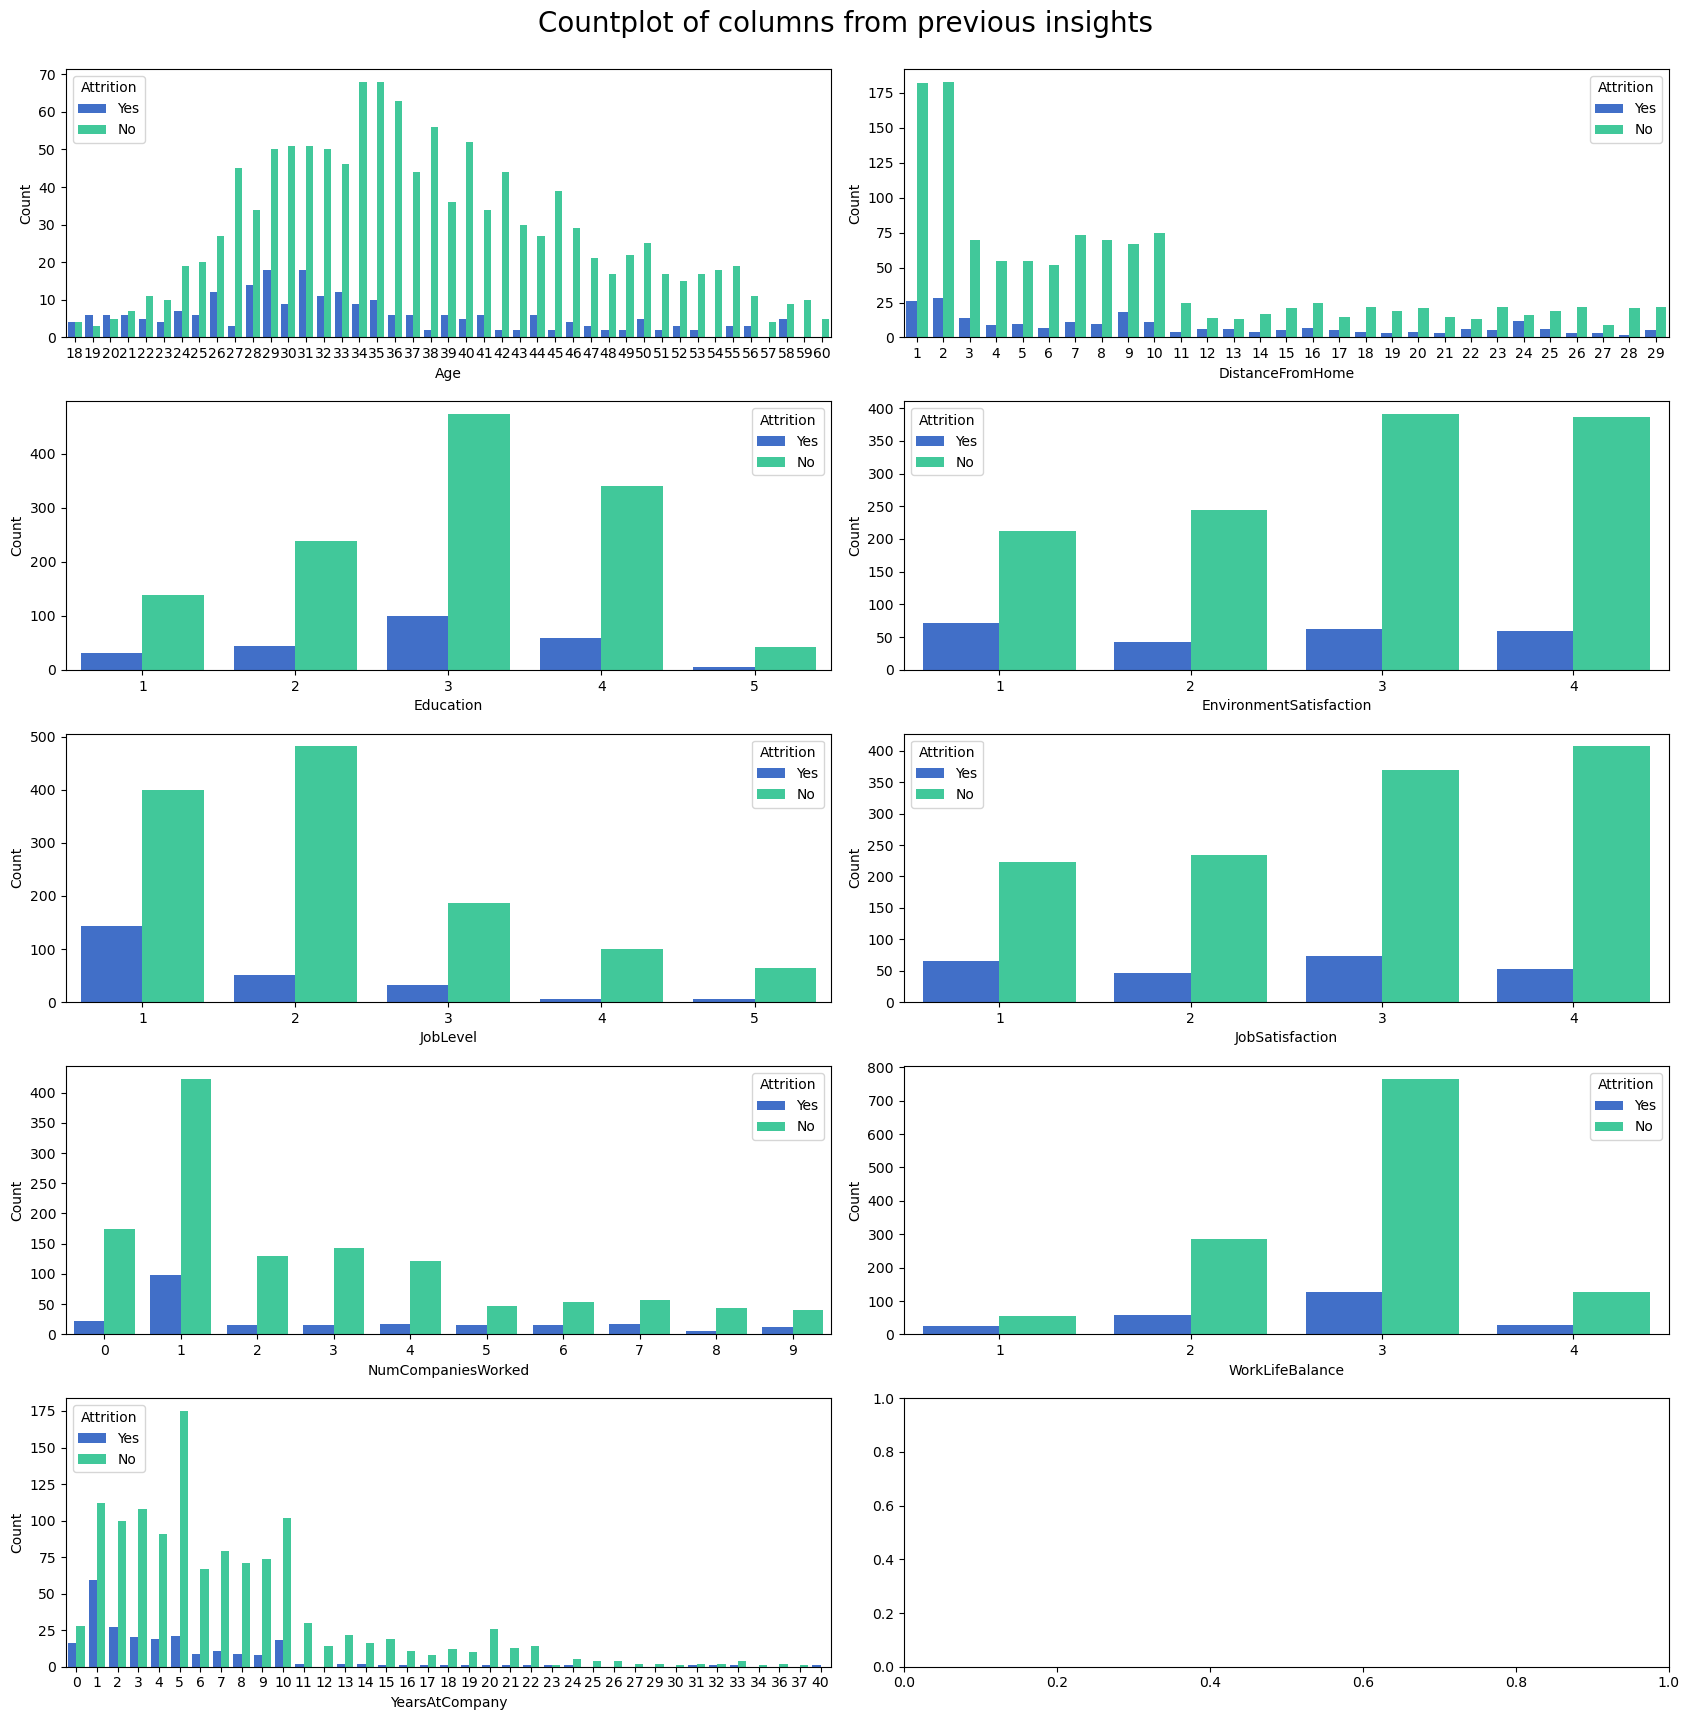

In [37]:
columns = ["Age", "DistanceFromHome", "Education", "EnvironmentSatisfaction",
           "JobLevel", "JobSatisfaction", "NumCompaniesWorked",
           "WorkLifeBalance", "YearsAtCompany"]

ncols = 2
nrows = np.ceil(len(columns) / ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(17, nrows * 3.5))

for c, ax in zip(columns, axs.flatten()):
    sns.countplot(data=ibm_data, x=c, hue="Attrition", ax=ax)
    ax.set_ylabel("Count")
    ax.set_xlabel(c)

fig.suptitle("Countplot of columns from previous insights", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Insights**:

* **Age**: The majority of employees, who fall within a age range of 26 to 33 are more likely to leave the company. There is a certain decline in employees, who leve the company at age 27. One possible reason for the lower attrition rate among 27-year-olds could be related to career stability and personal growth, as individuals in this age group may be more focused on building their professional foundation and gaining experience before considering job changes.

* **DistanceFromHome**: The majority of employees, who leave the company live near the office and also there is a group of employees who face specific commutes(9, 10), which could be at a higher risk of attrition.

* **Education**: Employees with Marketing education are more likely to leave.

* **JobLevel**: Employees at lower job levels are more prone to attrition.

*  **NumCompaniesWorked**: Employees, who have worked only at one company are more likely to leave.

* **WorkLifeBalance**: Employees with moderate work-life balance are more likely to leave.

* **YearsAtCompany**: Employees, who have worked for less than two years are more likely to leave. 

### 3.3. Distribution of variables grouped by the target variable using Boxplots

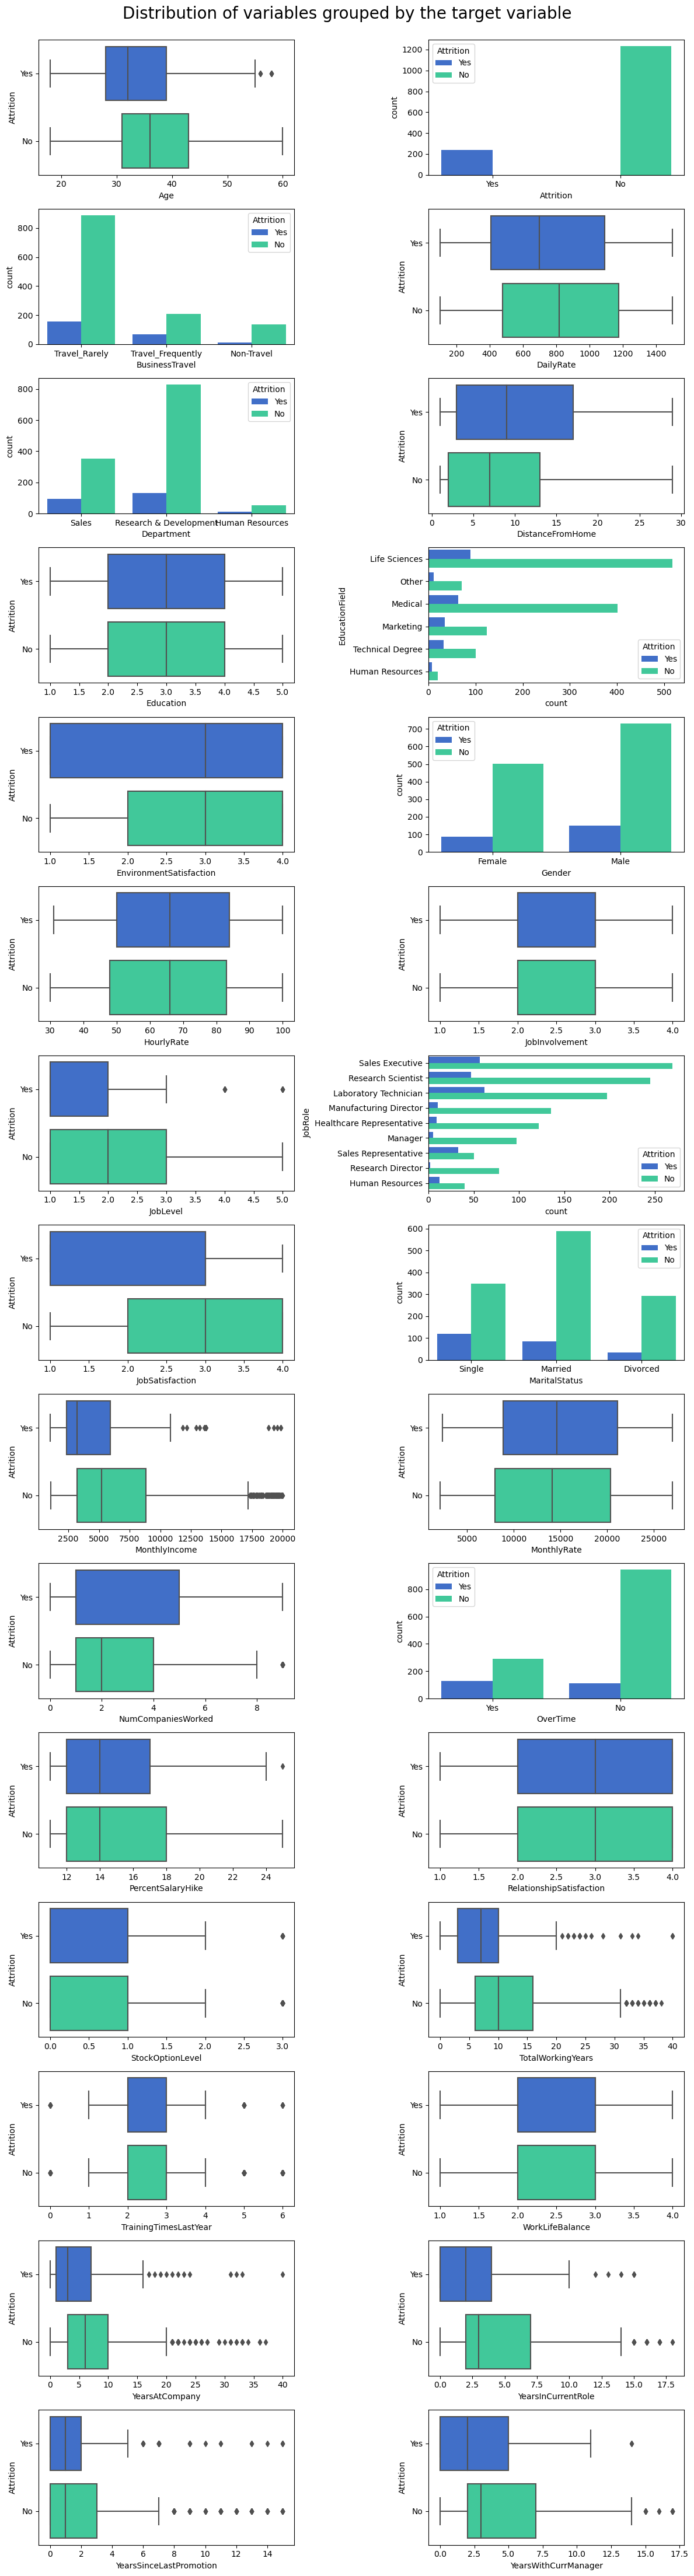

In [38]:
TARGET_CAT = "Attrition"
num_cols = len(ibm_data.columns)
ncols = 2  # Set the desired number of columns for the subplots
nrows = (num_cols + ncols - 2) // ncols  # Calculate the number of rows needed based on the number of columns

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, nrows * 3))

for idx, (c, ax) in enumerate(zip(ibm_data.columns, axs.flatten())):
    if ibm_data[c].dtype != "object":
        sns.boxplot(data=ibm_data, x=c, y=TARGET_CAT, ax=ax)
    else:
        if (c == "JobRole") or (c == "EducationField"):
            sns.countplot(data=ibm_data, y=c, hue=TARGET_CAT, ax=ax)
        else:
            sns.countplot(data=ibm_data, x=c, hue=TARGET_CAT, ax=ax)

fig.suptitle("Distribution of variables grouped by the target variable", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

**Insights:**

There are a lot of outlier in columns MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion.

**Action:**

Treat the outliers in the Data Preprocessing section.

### 3.4. Attrition Rates by Department and Gender

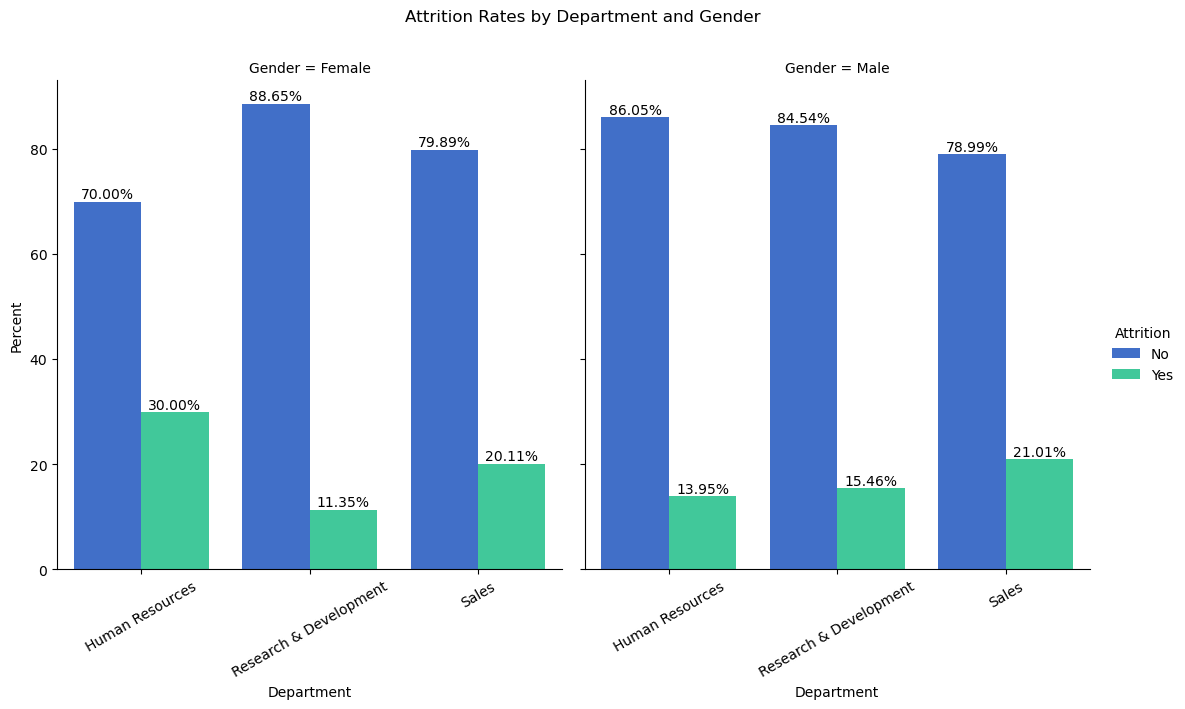

In [39]:
# Group the data and calculate percentages
plot_df = ibm_data.groupby(["Gender", "Department"])["Attrition"].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename("Percent").reset_index()

fig = sns.catplot(data = plot_df, x = "Department", y = "Percent", hue = "Attrition",
                  col = "Gender", kind="bar")

fig.fig.suptitle("Attrition Rates by Department and Gender", y = 1.05)
fig.set_xlabels("Department")
fig.set_ylabels("Percent")
fig.set_xticklabels(rotation=30)


# Add percentage labels to the bars
for ax in fig.axes.flatten():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f"{height:.2f}%", (x + width/2, y + height), ha = "center", va = "bottom")


fig.fig.set_size_inches(12, 6)

plt.show()

**Insights:**

Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

### 3.5. Attrition Rates by Work Life Balance and Gender

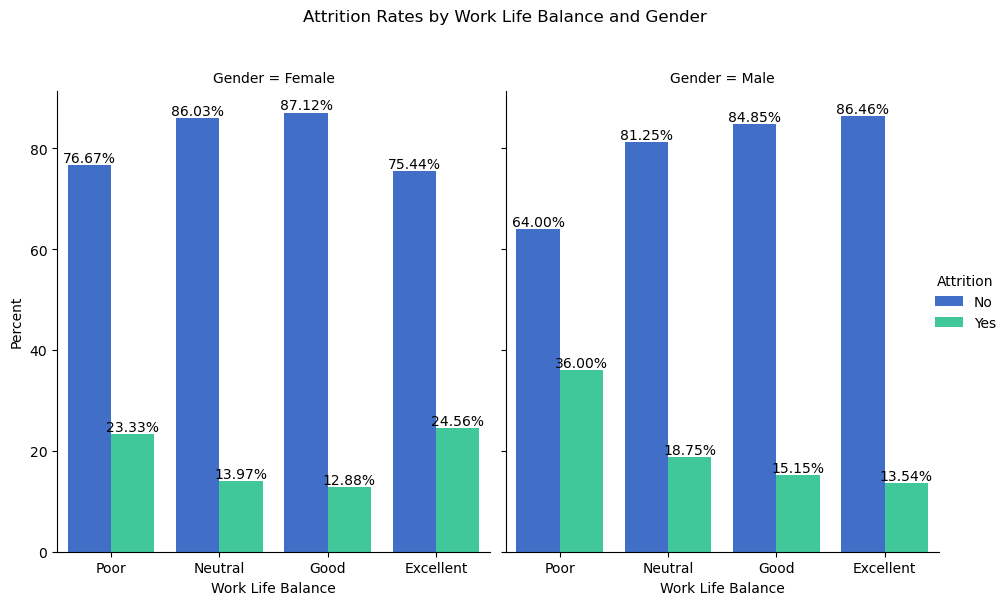

In [40]:
# Group the data and calculate percentages
plot_df = ibm_data.groupby(["WorkLifeBalance", "Gender"])["Attrition"].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

fig = sns.catplot(data = plot_df, x = "WorkLifeBalance", y = "Percent", hue = "Attrition",
                  col = "Gender", kind = "bar", aspect = 1.5, height = 4, ci = None)

fig.fig.suptitle("Attrition Rates by Work Life Balance and Gender", y = 1.05)
fig.set_xlabels("Work Life Balance")
fig.set_ylabels("Percent")
fig.set_xticklabels(['Poor', 'Neutral', 'Good', 'Excellent'])

# Add percentage labels to the bars
for ax in fig.axes.flatten():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f"{height:.2f}%", (x + width/2, y + height), ha = "center", va = "bottom")


fig.fig.set_size_inches(10, 6)

plt.show()

**Insights:** 

Among women with the highest rated work life balance, 1 out of 4 left the company, the highest proportion among the ratings for women. For men, the highest proportion occurred in those with the lowest work life balance.

### 3.6. Attrition Rates by Job Satisfaction

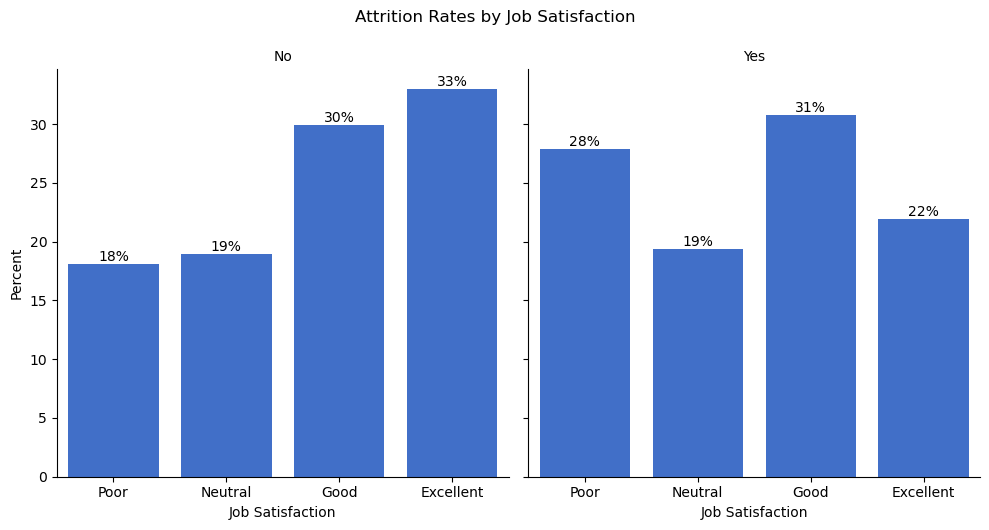

In [41]:
# Group the data and calculate percentages
plot_df = ibm_data.groupby(["Attrition", "JobSatisfaction"])["Attrition"].count()
plot_df = plot_df.groupby(level=0).apply(lambda x: x / x.sum() * 100).rename("Percent").reset_index()

plot_df["JobSatisfaction"] = pd.Categorical(plot_df["JobSatisfaction"], categories=[1, 2, 3, 4], ordered=True)
plot_df["JobSatisfaction"] = plot_df["JobSatisfaction"].replace({1: "Poor", 2: "Neutral", 3: "Good", 4: "Excellent"})

g = sns.FacetGrid(plot_df, col = "Attrition", height=5, aspect=1, col_wrap=2)
g.map(sns.barplot, "JobSatisfaction", "Percent", order = ["Poor", "Neutral", "Good", "Excellent"], ci=None)

# Add percentage labels to the bars
for ax in g.axes:
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height), ha='center', va='bottom')

g.set_titles("{col_name}")
g.set_xlabels("Job Satisfaction")
g.set_ylabels("Percent")
g.fig.suptitle("Attrition Rates by Job Satisfaction", y = 1.05)


plt.show()

**Insights:**

Among employees who left, the majority were satisfied in their job with 53% rating their job satisfaction as Good or Excellent, while 28% were the least satisfied in their job.

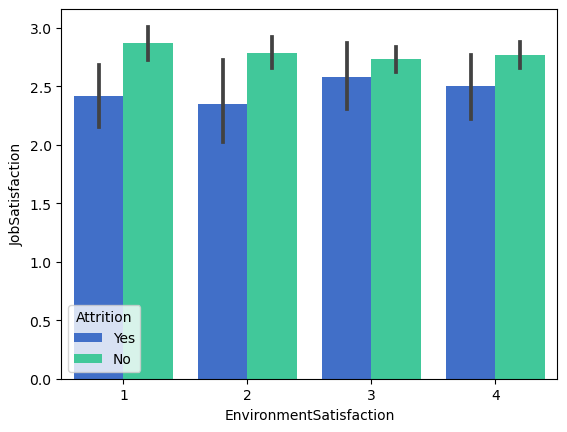

In [42]:
sns.barplot(data = ibm_data, x = "EnvironmentSatisfaction", y = "JobSatisfaction", hue= "Attrition")
plt.show()

**Insights:**

Employees generally have similar levels of satisfaction or dissatisfaction with their job and work environment.

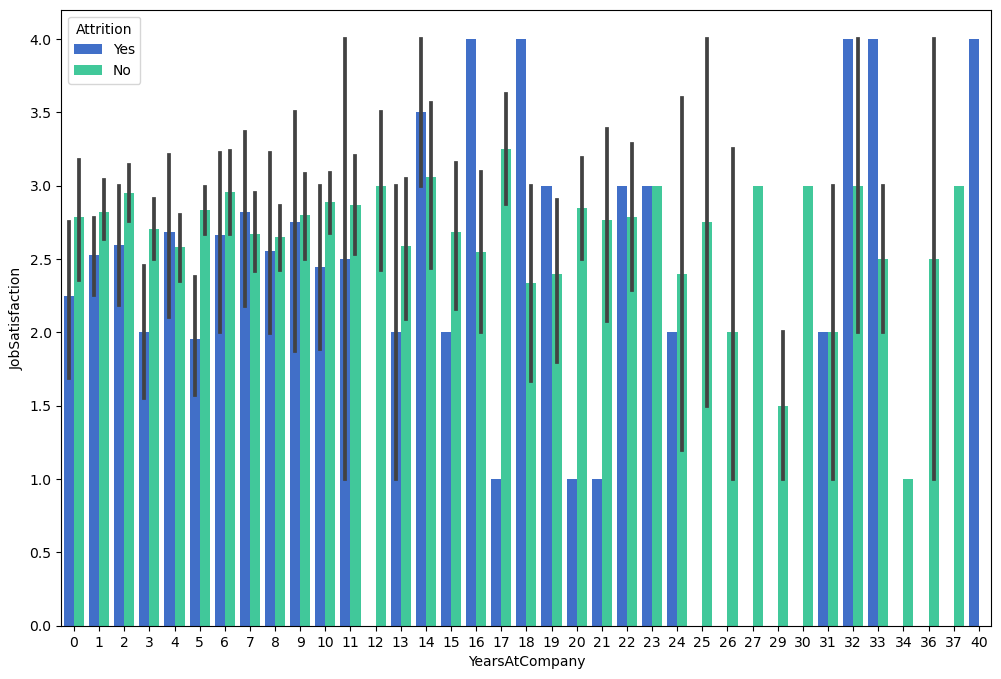

In [43]:
plt.figure(figsize = (12, 8))
sns.barplot(data = ibm_data, x = "YearsAtCompany", y = "JobSatisfaction", hue= "Attrition")
plt.show()

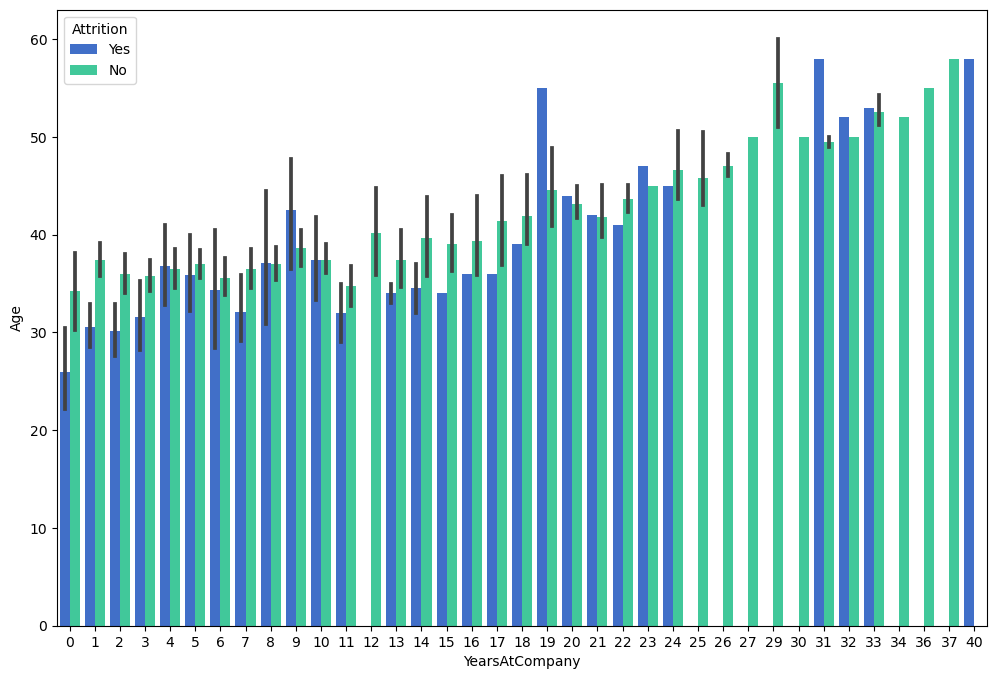

In [44]:
plt.figure(figsize = (12, 8))
sns.barplot(data = ibm_data, x = "YearsAtCompany", y = "Age", hue= "Attrition")
plt.show()

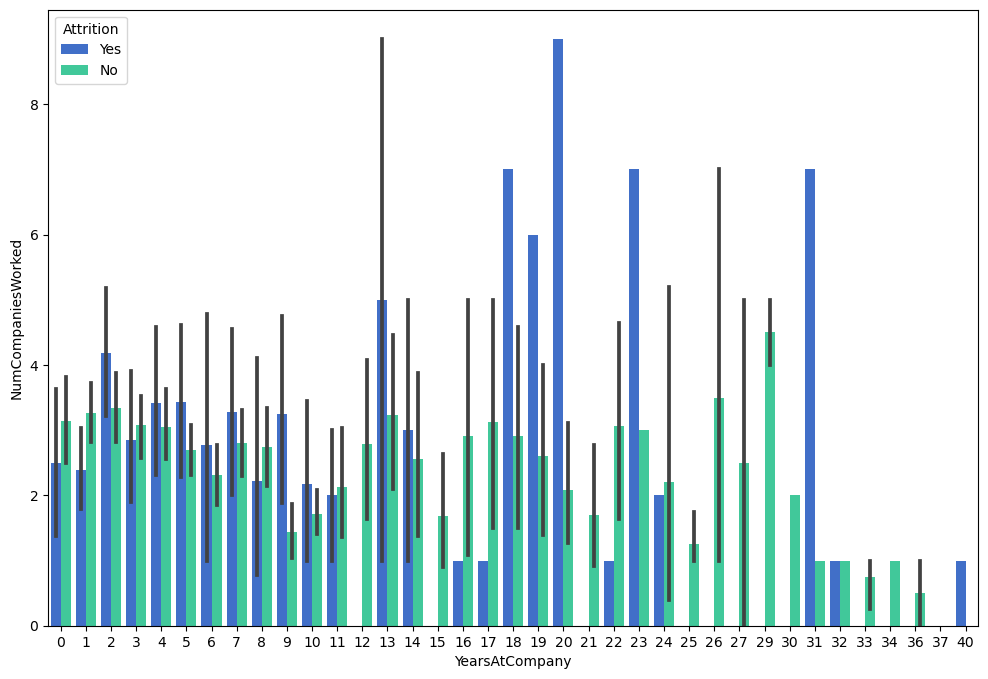

In [45]:
plt.figure(figsize = (12, 8))
sns.barplot(data = ibm_data, x = "YearsAtCompany", y = "NumCompaniesWorked", hue= "Attrition")
plt.show()

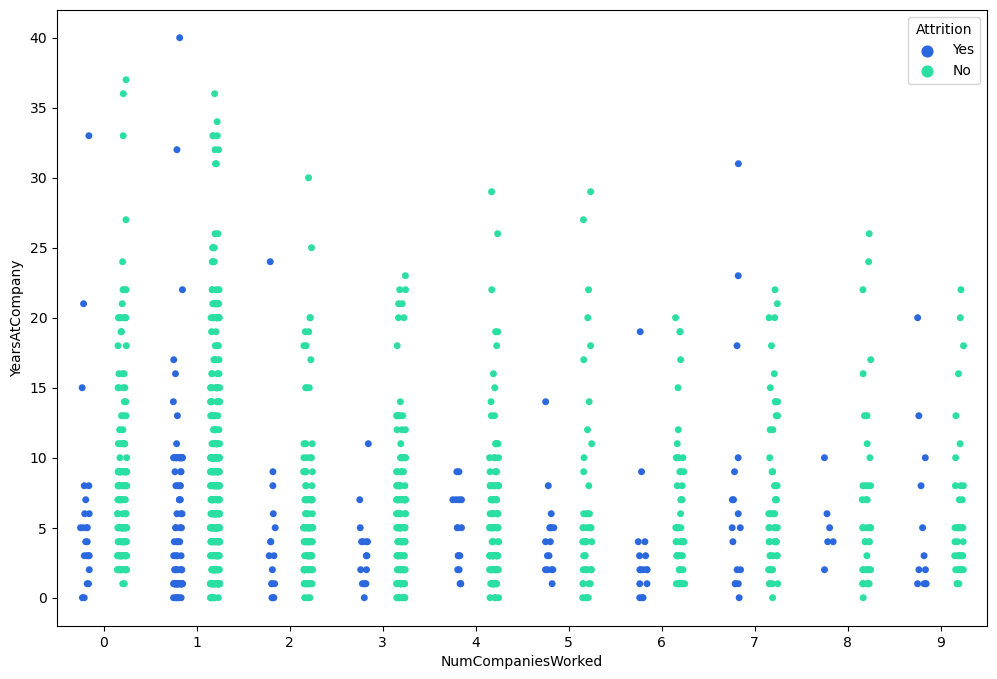

In [46]:
plt.figure(figsize=(12, 8))
sns.stripplot(data = ibm_data, y = "YearsAtCompany", x = "NumCompaniesWorked", hue = "Attrition", dodge = True)
plt.show()

In [47]:
ibm_data[(ibm_data["YearsAtCompany"] > 18) & (ibm_data["NumCompaniesWorked"] > 6) & (ibm_data["Attrition"] == "Yes")]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_int
595,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,4,Male,31,3,5,Research Director,2,Single,19246,25761,7,Yes,12,4,0,40,2,3,31,15,13,8,1
789,44,Yes,Travel_Rarely,1376,Human Resources,1,2,Medical,2,Male,91,2,3,Human Resources,1,Married,10482,2326,9,No,14,4,1,24,1,3,20,6,3,6,1
1223,47,Yes,Travel_Frequently,1093,Sales,9,3,Life Sciences,3,Male,82,1,4,Sales Executive,3,Married,12936,24164,7,No,11,3,0,25,3,1,23,5,14,10,1


In [48]:
ibm_data[(ibm_data["YearsAtCompany"] == 13) & (ibm_data["NumCompaniesWorked"] > 4) & (ibm_data["Attrition"] == "Yes")]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_int
1162,35,Yes,Travel_Rarely,737,Sales,10,3,Medical,4,Male,55,2,3,Sales Executive,1,Married,10306,21530,9,No,17,3,0,15,3,3,13,12,6,0,1


In [49]:
ibm_data_without_years_outliers = ibm_data.drop(ibm_data[((ibm_data["YearsAtCompany"] >= 13)) & (ibm_data["NumCompaniesWorked"] > 4) & (ibm_data["Attrition"] == "Yes")].index)

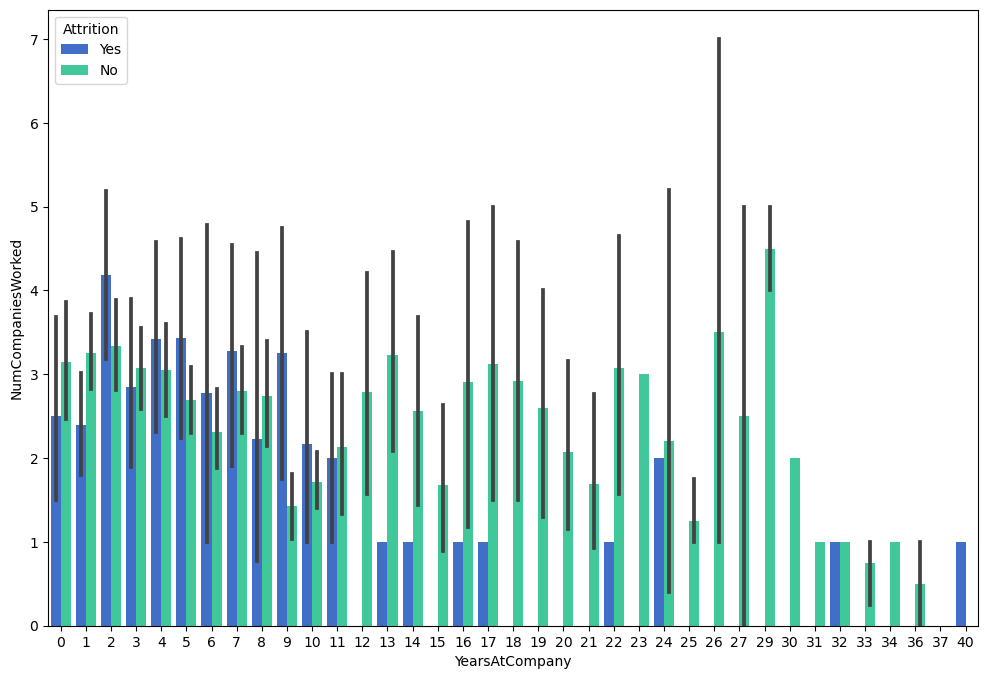

In [50]:
plt.figure(figsize = (12, 8))
sns.barplot(data = ibm_data_without_years_outliers, x = "YearsAtCompany", y = "NumCompaniesWorked", hue= "Attrition")
plt.show()

**Insights**:
* There are a small group of employees who are highly satisfied with their jobs and have worked for many years but still leave the company. These employees are between the ages of 35 and 58. These employees have either worked at a large number of companies which may indicate that they leave the company either to start their own business because of the experience at many companies or for other reasons like a career change. These employees can be considered outliers. To handle this outlier I have to decide weather to remove or retain them. 

**Action**: Further investigate if the outliers significantly skew my analysis and deviate too much from the majority of the data using boxplots and descriptive statistics.

### 3.7. Average Salaries by Department & Gender

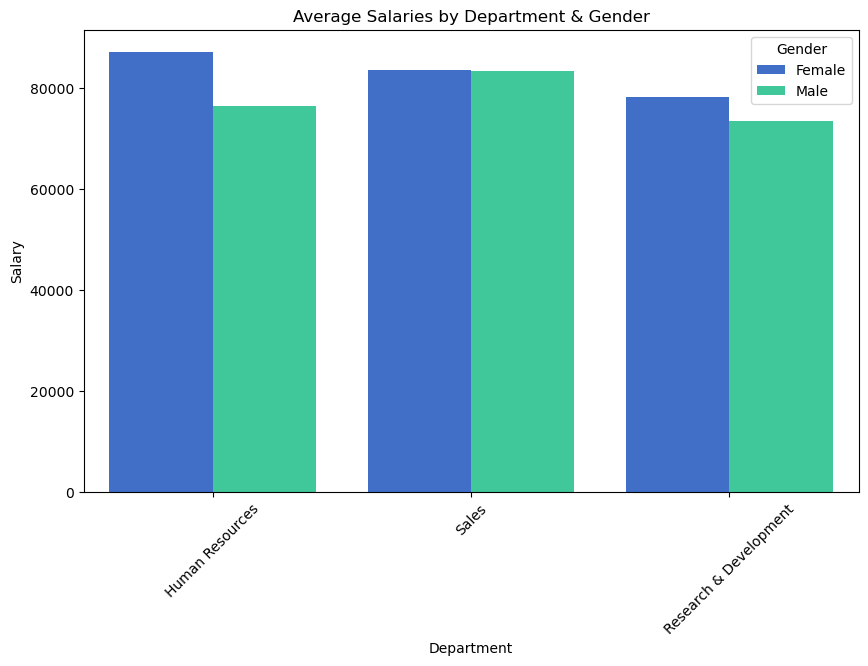

In [51]:
plot_df = ibm_data.groupby(["Department", "Gender"])["MonthlyIncome"].mean()
plot_df = plot_df.mul(12).rename("Salary").reset_index().sort_values("Salary", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x = "Department", y = "Salary", hue = "Gender")

plt.xlabel("Department")
plt.ylabel("Salary")
plt.title("Average Salaries by Department & Gender")

plt.xticks(rotation=45)
plt.show()

**Insights:**

Across each department, women on average have slightly higher salaries than men. The difference is too small to talk about gender discrimination.

### 3.8. Median Salaries by Department and Attrition Status

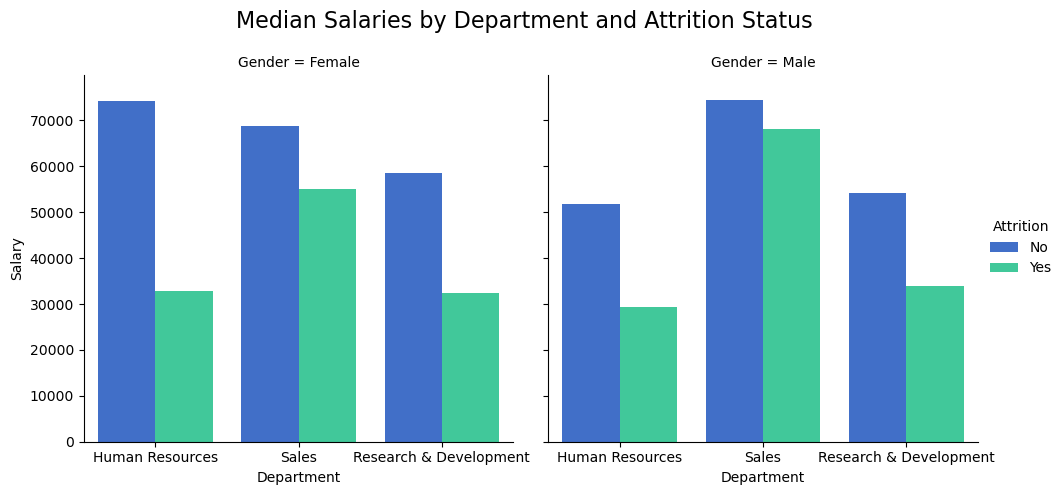

In [52]:
plot_df = ibm_data.groupby(["Department", "Gender", "Attrition"])["MonthlyIncome"].median()
plot_df = plot_df.mul(12).rename("Salary").reset_index().sort_values(["Gender", "Salary"], ascending=[True, False])

sns.catplot(data=plot_df, x="Department", y="Salary", hue="Attrition", col="Gender", kind="bar",
            height=5, aspect=1, ci=None)

plt.subplots_adjust(top=0.85)
plt.suptitle("Median Salaries by Department and Attrition Status", fontsize=16)

plt.ylim(0, 79900)
plt.xlabel("Department")
plt.ylabel("Salary")

plt.show()

**Insights:**

In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

### 3.9. Average Salaries by Job Role

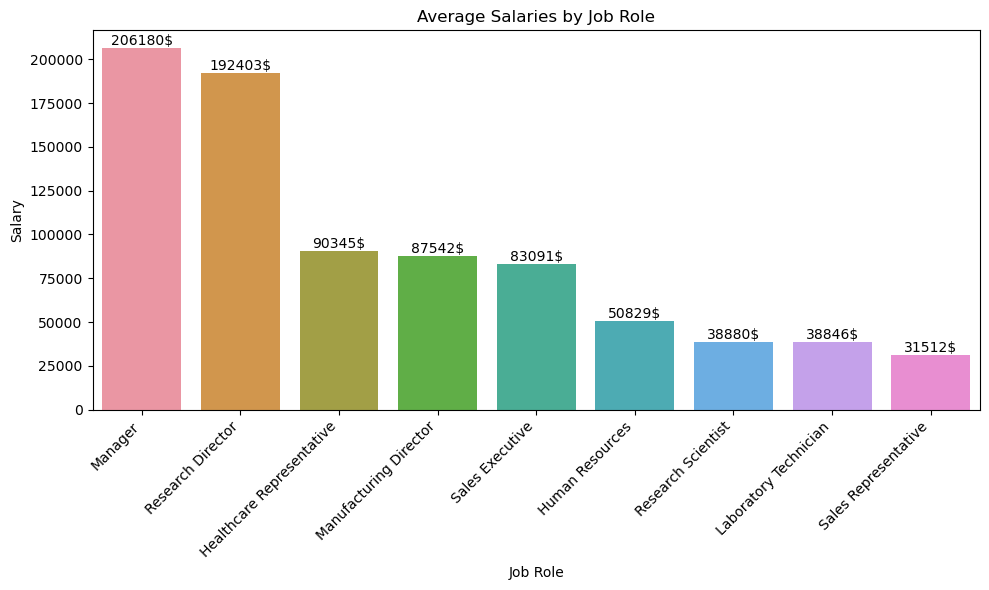

In [53]:
plot_df = ibm_data.groupby("JobRole")["MonthlyIncome"].mean()
plot_df = plot_df.mul(12).rename("Salary").reset_index().sort_values("Salary", ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(data = plot_df, x = "JobRole", y = "Salary")

# Add percentages above the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f"{height:.0f}$", (x + width/2, y + height), ha="center", va="bottom")

plt.title("Average Salaries by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Salary")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

**Insights:**

Managers and Research Directors have the highest average salaries, while Laboratory Technicians and Sales Representatives have the lowest.

### 3.10. Distribution of Monthly Income by Attrition Status

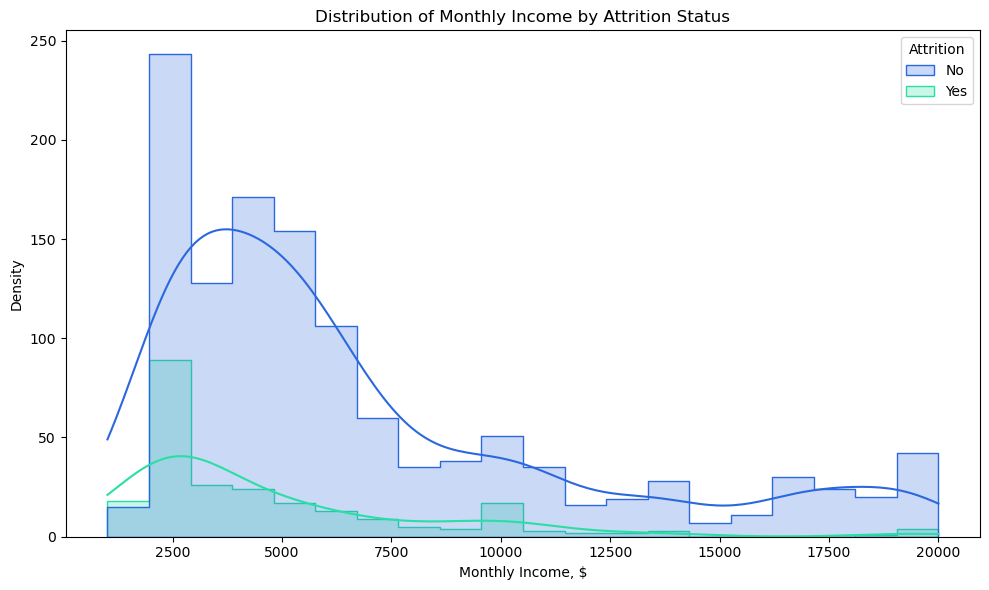

In [54]:
plot_df = ibm_data.sort_values(by="Attrition")

# Increase the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(data=plot_df, x="MonthlyIncome", hue="Attrition", element="step", kde=True,
             common_norm=False)

plt.title("Distribution of Monthly Income by Attrition Status")
plt.xlabel("Monthly Income, $")
plt.ylabel("Density")

plt.tight_layout()

plt.show()

**Insights**:

The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left. Former employees had a median monthly income more than $2,000 less than current employees.

### 3.11. Correlation Matrix of Employee Attrition

In [55]:
ibm_data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_int
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


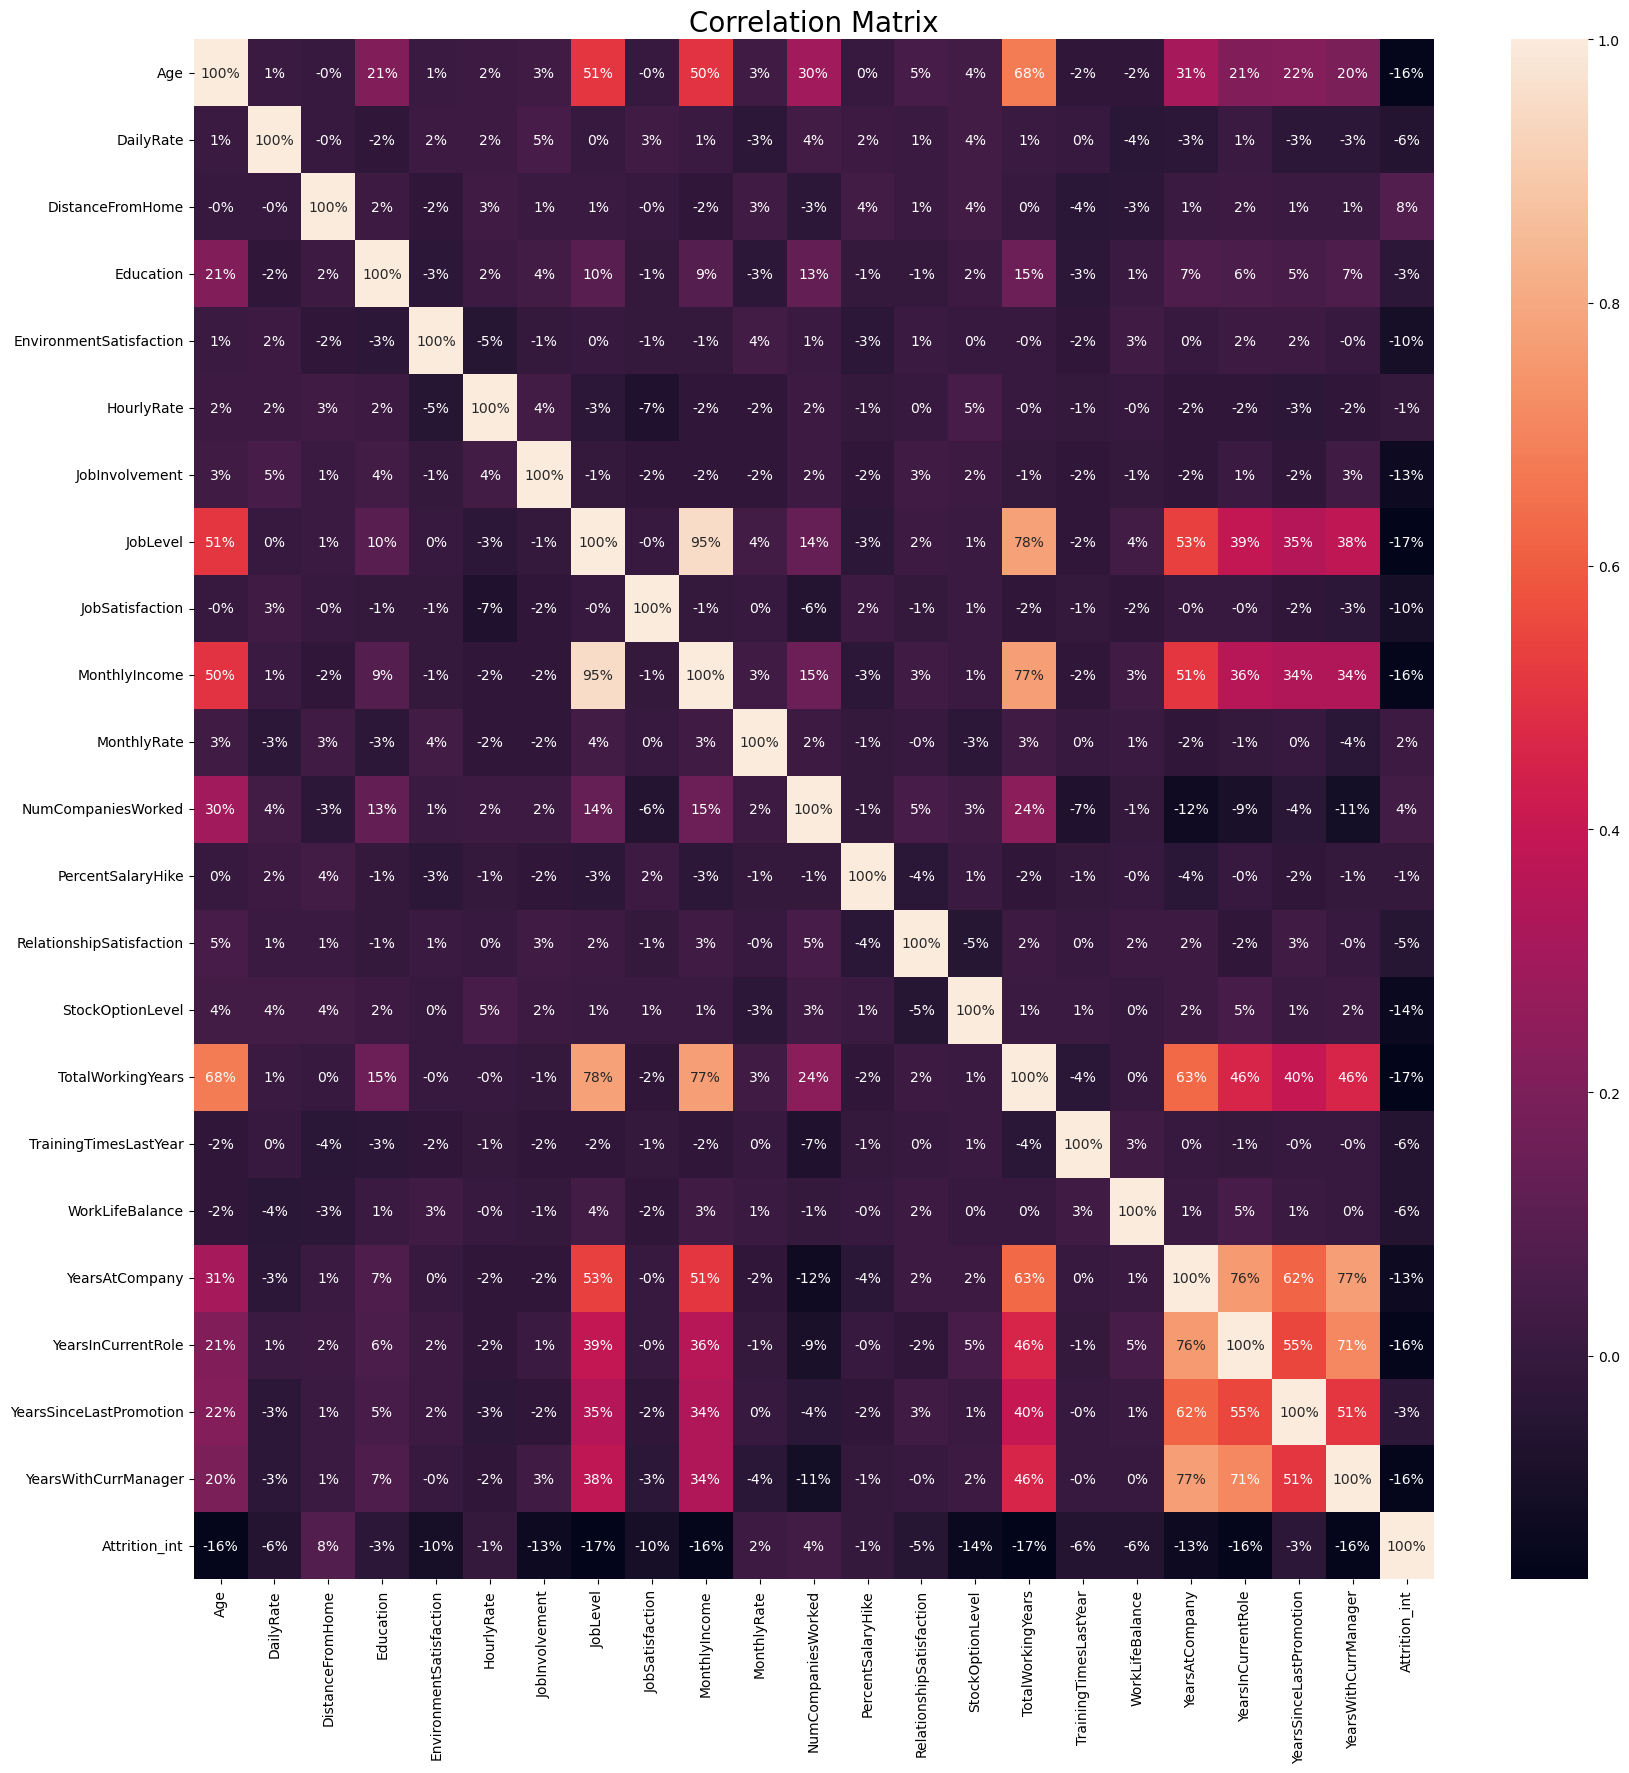

In [56]:
plt.figure(figsize=(20, 20)) # set the figure size

sns.heatmap(ibm_data.corr().round(2), annot=True, fmt=".0%")

plt.title("Correlation Matrix", fontsize=20)

plt.show()

**Insights**:

* **Age** is positively correlated with job level, monthly income, and total working years, which makes sense since older employees generally have more experience and may have been with the company for longer.

* **Years at company**, **years in current role**, and **years with current manager** all have positive correlations with job level, indicating that employees who have been with the company longer tend to advance to higher positions.

* **Job level** is positively correlated with monthly income and total working years, indicating that higher job positions come with higher salaries and require more experience.

* **Distance from home** has a weak positive correlation with years with current manager and years at company, suggesting that employees who live farther from the company may be more likely to leave if they are not satisfied with their current manager or have been at the company for a long time.

* **Distance from home** has a weak positive correlation with percent salary hike, suggesting that employees who live farther away from work may receive slightly higher raises to compensate for the inconvenience of a longer commute.

* **Job satisfaction** has a weak negative correlation with percent salary hike, implying that employees who receive higher raises are not necessarily more satisfied with their jobs.

* **Attrition_int** (the target variable) has a weak positive correlation with age, indicating that older employees may be more likely to leave the company. It also has a weak negative correlation with job satisfaction, indicating that employees with lower job satisfaction may be more likely to leave the company.

* There is no strong multicollinearity between **DailyRate**, **HourlyRate**, **MonthlyIncome**, and **MonthlyRate**. Therefore, we do not need to remove any of these columns due to multicollinearity

*Note: Correlation does not necessarily imply causation, and other factors may be involved in employee attrition, which will be explored further.*

### 3.12. Post EDA conclusions

## 4. Hypotesis testing

### 4.1. Independent T-Test

I will compare the average monthly income between current and former employees using an independent t-test. This test will help me determine if there is a significant difference in the average incomes of these two groups. To meet one of the assumptions of the t-test, which assumes approximately normal distribution of the continuous variable, I will transform the data by taking the logarithm before conducting the analysis.

Hypothesis:

$H_0$: The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees.
$u_1=u_2$

$H_1$: The alternative hypothesis is that the average monthly income of former employees is different than current employees.
$u_1≠u_2$

In [57]:
warnings.filterwarnings("ignore", category=FutureWarning)

group1 = ibm_data["MonthlyIncome"][ibm_data["Attrition"] == "Yes"]
group2 = ibm_data["MonthlyIncome"][ibm_data["Attrition"] == "No"]

summary, res = rp.ttest(group1, group2, group1_name="Former Employees", group2_name = "Current Employees")
print("\nSummary Statistics:")
display(summary)
display(res)


Summary Statistics:


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Former Employees,237.0,4787.092827,3640.210367,236.457073,4321.256585,5252.929069
1,Current Employees,1233.0,6832.739659,4818.208001,137.215763,6563.537235,7101.942084
2,combined,1470.0,6502.931293,4707.956783,122.793054,6262.062872,6743.799713


,Independent t-test,results
0,Difference (Former Employees - Current Employe...,-2045.6468
1,Degrees of freedom =,1468.0000
2,t =,-6.2039
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.4400
7,Hedge's g =,-0.4398
8,Glass's delta1 =,-0.5620
9,Point-Biserial r =,-0.1598


**Insights:**

The p-value of the T-Test is 0, which is less than our significance level, $a$ of 0.05. Therefore, there is evidence to support that the average monthly income of former employees is different than the average monthly income of current employees.

### 4.2. Chi-Square Test of Independence

I will conduct a chi-square test of independence to examine the potential relationship between **Attrition** and the other categorical variables in our dataset. 

The purpose of this test is to assess whether there is a significant association between Attrition and the variable under investigation. 

$H_0$: The null hypothesis assumes that the variables are independent, meaning there is no connection between Attrition and the variable being tested.

$H_1$: The alternative hypothesis suggests the presence of a relationship between the two variables. 

By performing this statistical test, we can gain insights into the potential associations within our data and further analyze the factors influencing attrition.

In [58]:
chi_statistic = []
p_val = []
vars_rm = []

for i in ibm_data[CAT_COLS]:
    observed = pd.crosstab(index = ibm_data["Attrition"], columns = ibm_data[i])
    stat, p, dof, expected = chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = CAT_COLS
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df = chi_df[chi_df.P_value < 0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and Education are independent (p-value = 0.55).

Attrition and Gender are independent (p-value = 0.29).

Attrition and RelationshipSatisfaction are independent (p-value = 0.15).



,Variable,Chi_Statistic,P_value
0,Attrition,1462.614554,0.000000e+00
16,Attrition_int,1462.614554,0.000000e+00
12,OverTime,87.564294,8.158424e-21
9,JobRole,86.190254,2.752482e-15
8,JobLevel,72.529013,6.634685e-15
14,StockOptionLevel,60.598301,4.379390e-13
11,MaritalStatus,46.163677,9.455511e-11
7,JobInvolvement,28.492021,2.863181e-06
1,BusinessTravel,24.182414,5.608614e-06
5,EnvironmentSatisfaction,22.503881,5.123469e-05


**Insights:**


Based on the results of the chi-square test, several factors have been identified as significant in determining whether an employee stays at the company. These factors include work-life balance, job satisfaction, overtime work, stock options, and department. On the other hand, variables such as **Education, Gender and Relationship satisfaction** have been found to be independent of attrition. As a result, these independent variables will be excluded from the predictor variables in the model.

In [59]:
ibm_data = ibm_data.drop(columns = ["Education", "Gender", "RelationshipSatisfaction"])

In [60]:
ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_int
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,1,6,3,3,2,2,2,2,0


## 5. Data Preprocessing & Transformation

### 5.1. Handling Outliers

I have detected many outliers in the EDA section for columns MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion. I am going to treat them using Winsorization.

**Winsorization** is a good choice for outlier treatment in this project for the following reasons:

* Retains Data Distribution: Winsorization replaces extreme outlier values with values that are close to the rest of the data. It does not remove the data points entirely, which helps in retaining the overall data distribution. This is important as it preserves the original patterns and characteristics of the data.

* Robust to Extreme Outliers: Winsorization is robust to extreme outliers because it replaces the extreme values with less extreme values from the same dataset. It avoids the issue of removing or transforming outliers that may contain valuable information or represent valid observations in the context of the problem.

* Minimal Impact on Statistical Analysis: Winsorization ensures that the summary statistics (mean, standard deviation, etc.) and relationships between variables are minimally affected. By limiting the extreme values rather than removing them, it prevents significant distortions in statistical analysis and modeling.

* Maintains Sample Size: Since Winsorization retains the data points, it helps maintain the sample size, which is crucial for statistical analysis and model building. Removing outliers can lead to a reduction in the sample size, which may result in loss of valuable information and statistical power.

* Simple and Interpretable: Winsorization is a straightforward technique to implement and interpret. It involves replacing extreme values with trimmed values within specified limits. This simplicity makes it accessible and easier to communicate to stakeholders or other team members.

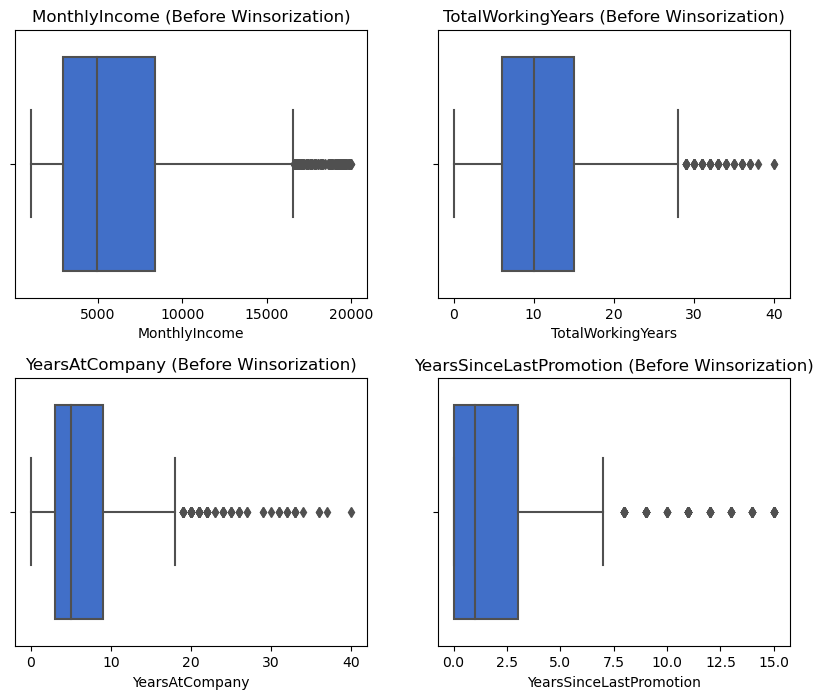

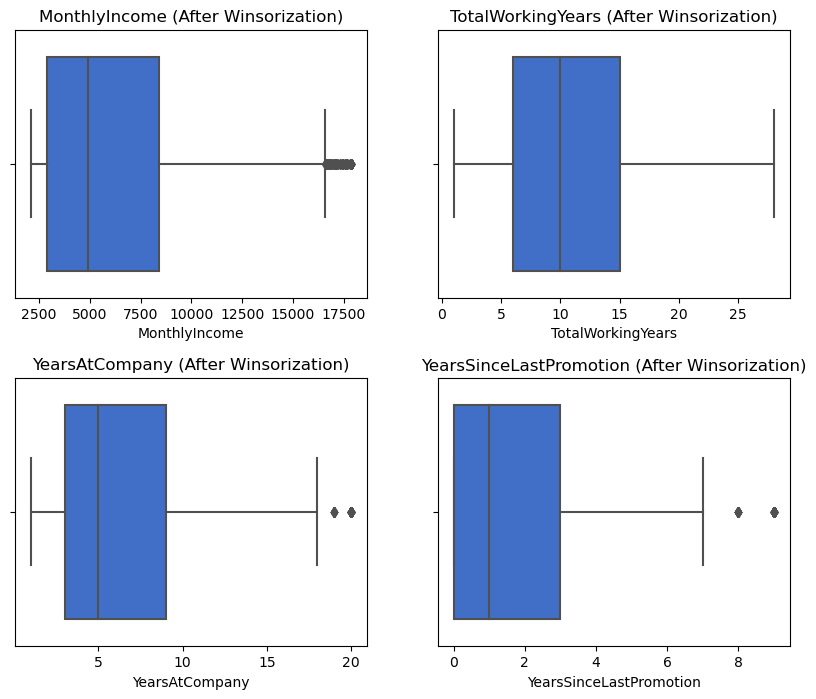

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3)

# Boxplot before Winsorization
sns.boxplot(data=ibm_data, x="MonthlyIncome", ax=axes[0, 0])
axes[0, 0].set_title("MonthlyIncome (Before Winsorization)")

sns.boxplot(data=ibm_data, x="TotalWorkingYears", ax=axes[0, 1])
axes[0, 1].set_title("TotalWorkingYears (Before Winsorization)")

sns.boxplot(data=ibm_data, x="YearsAtCompany", ax=axes[1, 0])
axes[1, 0].set_title("YearsAtCompany (Before Winsorization)")

sns.boxplot(data=ibm_data, x="YearsSinceLastPromotion", ax=axes[1, 1])
axes[1, 1].set_title("YearsSinceLastPromotion (Before Winsorization)")

# Apply Winsorization to specified columns
from scipy.stats.mstats import winsorize

columns_to_winsorize = ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion"]
winsorize_limits = [0.05, 0.05]  # the bottom and top 5% of values will be replaced

for column in columns_to_winsorize:
    ibm_data[column] = winsorize(ibm_data[column], limits=winsorize_limits)

# Boxplot after Winsorization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3)

sns.boxplot(data=ibm_data, x="MonthlyIncome", ax=axes[0, 0])
axes[0, 0].set_title("MonthlyIncome (After Winsorization)")

sns.boxplot(data=ibm_data, x="TotalWorkingYears", ax=axes[0, 1])
axes[0, 1].set_title("TotalWorkingYears (After Winsorization)")

sns.boxplot(data=ibm_data, x="YearsAtCompany", ax=axes[1, 0])
axes[1, 0].set_title("YearsAtCompany (After Winsorization)")

sns.boxplot(data=ibm_data, x="YearsSinceLastPromotion", ax=axes[1, 1])
axes[1, 1].set_title("YearsSinceLastPromotion (After Winsorization)")

# Adjust spacing between subplots
# plt.tight_layout()

# Display the plots
plt.show()

### 5.2. Encoding categorical variables

#### Binary encoding

In [62]:
# I have already encoded the column Attrition and saved the values in Attrition_int
# I am going to leave only one column -> Remove column Attrition -> Rename Attrition_int to Attrition
ibm_data = ibm_data.drop(columns = ["Attrition"])
ibm_data.rename(columns={"Attrition_int": "Attrition"}, inplace=True)

ibm_data["OverTime"] = ibm_data["OverTime"].replace({'No': 0, 'Yes': 1})

In [63]:
ibm_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,Life Sciences,2,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,Life Sciences,3,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,Other,4,92,2,1,Laboratory Technician,3,Single,2097,2396,6,1,15,0,7,3,3,1,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,Medical,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,1,6,3,3,2,2,2,2,0


#### Ordinal encoding

In [64]:
ibm_data["BusinessTravel"] = ibm_data["BusinessTravel"].replace({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})

In [65]:
ibm_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,Sales,1,Life Sciences,2,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,0,8,0,1,6,4,0,5,1
1,49,2,279,Research & Development,8,Life Sciences,3,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,1,10,3,3,10,7,1,7,0
2,37,1,1373,Research & Development,2,Other,4,92,2,1,Laboratory Technician,3,Single,2097,2396,6,1,15,0,7,3,3,1,0,0,0,1
3,33,2,1392,Research & Development,3,Life Sciences,4,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,0,8,3,3,8,7,3,0,0
4,27,1,591,Research & Development,2,Medical,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,1,6,3,3,2,2,2,2,0


#### One-hot Encoding

In [66]:
ibm_data = pd.get_dummies(ibm_data, drop_first = True)

In [67]:
pd.options.display.max_columns = 100
ibm_data

,Age,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,94,3,2,4,5993,19479,8,1,11,0,8,0,1,6,4,0,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,2,279,8,3,61,2,2,2,5130,24907,1,0,23,1,10,3,3,10,7,1,7,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,4,92,2,1,3,2097,2396,6,1,15,0,7,3,3,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,2,1392,3,4,56,3,1,3,2909,23159,1,1,11,0,8,3,3,8,7,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,1,591,2,1,40,3,1,2,3468,16632,9,0,12,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,23,3,41,4,2,4,2571,12290,4,0,17,1,17,3,3,5,2,0,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1466,39,1,613,6,4,42,2,3,1,9991,21457,4,0,15,1,9,5,3,7,7,1,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1467,27,1,155,4,2,87,4,2,2,6142,5174,1,1,20,1,6,0,3,6,2,0,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1468,49,2,1023,2,4,63,2,2,2,5390,13243,2,0,14,0,17,3,2,9,6,0,8,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [68]:
ibm_data.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('uint8')], dtype=object)

### 5.4. Feature Extraction/Engineering

#### Combining existing features

In the EDA, it was observed that employees generally have similar levels of satisfaction or dissatisfaction with their job and work environment. To capture this overall satisfaction level more effectively, a new feature called "Total_satisfaction" was created by combining the individual satisfaction scores from "EnvironmentSatisfaction" "JobSatisfaction" for each employee. This consolidation reduces dimensionality, captures the overall satisfaction in a concise manner, and eliminates the need to include all five individual satisfaction questions in the predictive modeling stage. By combining these features, redundant information is removed, the analysis is simplified, and the overall satisfaction level of employees is captured more succinctly.

In [69]:
ibm_data["Total_satisfaction"] = ibm_data[["EnvironmentSatisfaction", "JobSatisfaction"]].mean(axis=1)

In [70]:
ibm_data = ibm_data.drop(columns = ["EnvironmentSatisfaction", "JobSatisfaction"])

In [71]:
ibm_data

,Age,BusinessTravel,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Total_satisfaction
0,41,1,1102,1,94,3,2,5993,19479,8,1,11,0,8,0,1,6,4,0,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3.0
1,49,2,279,8,61,2,2,5130,24907,1,0,23,1,10,3,3,10,7,1,7,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2.5
2,37,1,1373,2,92,2,1,2097,2396,6,1,15,0,7,3,3,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,3.5
3,33,2,1392,3,56,3,1,2909,23159,1,1,11,0,8,3,3,8,7,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3.5
4,27,1,591,2,40,3,1,3468,16632,9,0,12,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,23,41,4,2,2571,12290,4,0,17,1,17,3,3,5,2,0,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3.5
1466,39,1,613,6,42,2,3,9991,21457,4,0,15,1,9,5,3,7,7,1,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.5
1467,27,1,155,4,87,4,2,6142,5174,1,1,20,1,6,0,3,6,2,0,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2.0
1468,49,2,1023,2,63,2,2,5390,13243,2,0,14,0,17,3,2,9,6,0,8,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3.0


#### Binning

I will group the "Age" column into age ranges like "young," "middle-aged," and "old." By dividing the continuous range into meaningful bins, I will be able to identify patterns or trends that may not be apparent when treating the feature as a continuous variable. 

Binning can also help mitigate the impact of outliers or extreme values by grouping them with similar values in the same bin. This can prevent outliers from disproportionately influencing the relationship between the feature and the target variable.

In [73]:
# Define the bin edges and labels
bin_edges = [0, 30, 50, 100] 
bin_labels = [0, 1, 2] # 'young', 'middle-aged', 'old'

# Perform binning using pandas cut()
ibm_data["Age_Bin"] = pd.cut(ibm_data["Age"], bins=bin_edges, labels=bin_labels)

In [74]:
ibm_data = ibm_data.drop(columns = ["Age"])

In [75]:
ibm_data

,BusinessTravel,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Total_satisfaction,Age_Bin
0,1,1102,1,94,3,2,5993,19479,8,1,11,0,8,0,1,6,4,0,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3.0,1
1,2,279,8,61,2,2,5130,24907,1,0,23,1,10,3,3,10,7,1,7,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2.5,1
2,1,1373,2,92,2,1,2097,2396,6,1,15,0,7,3,3,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,3.5,1
3,2,1392,3,56,3,1,2909,23159,1,1,11,0,8,3,3,8,7,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3.5,1
4,1,591,2,40,3,1,3468,16632,9,0,12,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,884,23,41,4,2,2571,12290,4,0,17,1,17,3,3,5,2,0,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3.5,1
1466,1,613,6,42,2,3,9991,21457,4,0,15,1,9,5,3,7,7,1,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.5,1
1467,1,155,4,87,4,2,6142,5174,1,1,20,1,6,0,3,6,2,0,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2.0,0
1468,2,1023,2,63,2,2,5390,13243,2,0,14,0,17,3,2,9,6,0,8,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3.0,1


### 5.2. Feature Scaling/Normalization

In [76]:
numerical_features = [col for col in ibm_data.columns if col not in CAT_COLS]

In [77]:
numerical_features

['DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Total_satisfaction',
 'Age_Bin']

In [78]:
scaler = MinMaxScaler()
ibm_data[numerical_features] = scaler.fit_transform(ibm_data[numerical_features])

### 5.5. Handling Imbalanced Data

#### Combined Sampling

In [79]:
X = ibm_data.drop("Attrition", axis=1)
y = ibm_data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sampler = SMOTEENN(random_state = 42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

balanced_data = pd.concat([X_resampled, y_resampled], axis = 1)

### 5.6. Feature Selection

In [80]:
X = balanced_data.drop(["Attrition"], axis=1)
y = balanced_data["Attrition"]

rf = RandomForestClassifier()

rf.fit(X, y)

importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top k features
k = 15
selected_features = X.columns[indices][:k]

# Create a new dataframe with the selected features
balanced_data_features = balanced_data[selected_features]

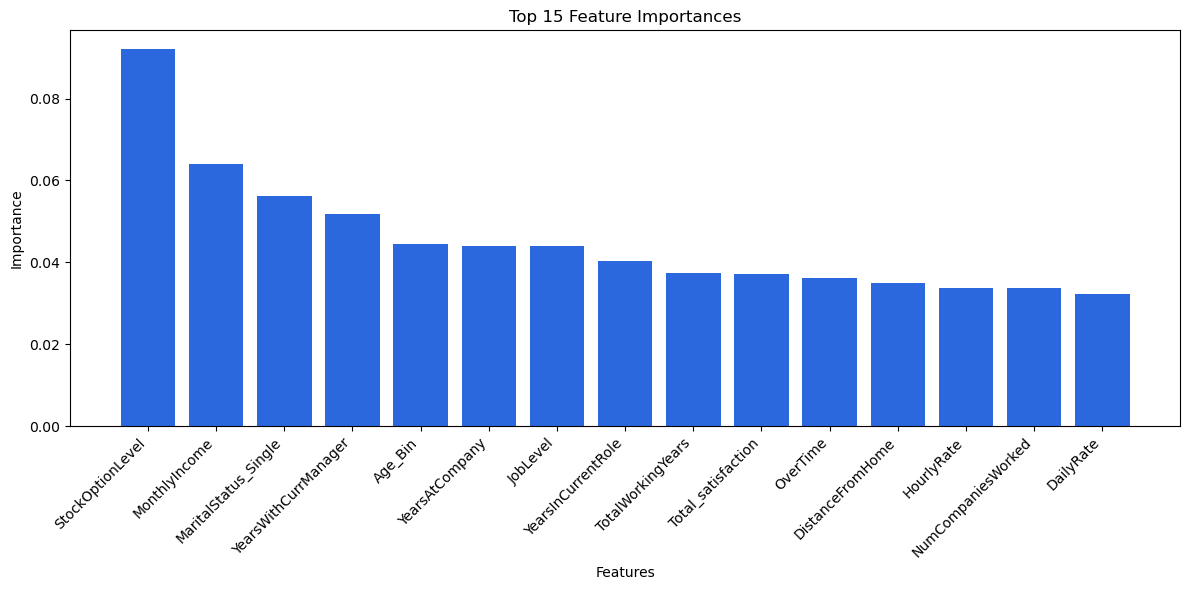

In [81]:
# Get the feature importances and indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

importance_values = importances[indices][:k]


plt.figure(figsize=(12, 6))
plt.bar(range(k), importance_values, align='center')
plt.xticks(range(k), selected_features, rotation = 45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(k))
plt.tight_layout()
plt.show()

In [82]:
balanced_data_features

,StockOptionLevel,MonthlyIncome,MaritalStatus_Single,YearsWithCurrManager,Age_Bin,YearsAtCompany,JobLevel,YearsInCurrentRole,TotalWorkingYears,Total_satisfaction,OverTime,DistanceFromHome,HourlyRate,NumCompaniesWorked,DailyRate
0,0,0.000000,1.0,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.666667,0,0.142857,0.614286,0.111111,0.132427
1,1,0.306745,0.0,0.117647,0.000000,0.105263,2,0.111111,0.333333,1.000000,0,0.678571,0.214286,0.222222,0.819613
2,0,0.202932,0.0,0.000000,0.500000,0.210526,2,0.222222,0.222222,0.666667,0,0.392857,0.514286,0.444444,0.279170
3,0,0.291262,1.0,0.647059,0.500000,0.684211,2,0.611111,0.481481,0.833333,0,0.035714,0.971429,0.111111,0.216178
4,0,0.481122,1.0,0.000000,0.500000,0.000000,2,0.000000,0.259259,1.000000,0,0.142857,0.371429,0.888889,0.909807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,0,0.016039,1.0,0.000000,0.183689,0.000000,1,0.000000,0.027213,0.833333,0,0.532774,0.703506,0.356030,0.383112
1504,0,0.056144,1.0,0.015993,0.000000,0.017887,1,0.015105,0.015105,0.022657,0,0.104715,0.760747,0.103559,0.041028
1505,0,0.065717,1.0,0.220524,0.000000,0.197311,1,0.156205,0.173561,0.177129,0,0.051562,0.441898,0.111111,0.931950
1506,0,0.049759,1.0,0.198575,0.000000,0.177672,1,0.149327,0.150506,0.166667,1,0.000000,0.622118,0.111111,0.808888


### 5.7. Dimensionality Reduction

#### Principal Component Analysis (PCA)

In [83]:
# Reference: https://www.kaggle.com/code/tilii7/dimensionality-reduction-pca-tsne

X = balanced_data.drop(['Attrition'], axis=1)
y = balanced_data['Attrition']

pca = PCA()

pca.fit(X)

PCA()

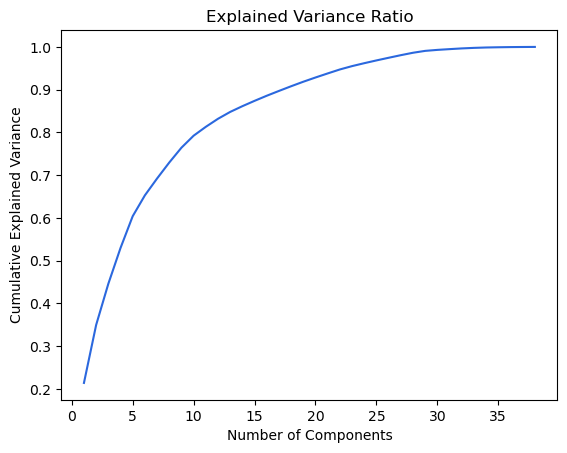

In [84]:
# Determine the optimal number of components to keep
# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [85]:
# Choose the number of components to keep based on the plot

# Perform PCA with the selected number of components
n_components = 10 # based on Elbow Rule
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

# Create a new dataframe with the PCA-transformed features
pca_data = pd.DataFrame(data=X_pca, columns = [f"PC{i+1}" for i in range(n_components)])

# Concatenate the PCA-transformed features with the target variable
pca_data["Attrition"] = y

In [86]:
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(10):
    print(pca.explained_variance_ratio_[j])

Explained variance: 0.7924
Individual variance contributions:
0.21420218201497762
0.13548792483792904
0.09631874270734657
0.08371323212416089
0.07436415858386257
0.04879091963145507
0.03941243044864297
0.03734633319651026
0.034688255683856514
0.028074199991580073


**Insights:** 
* Observation: PCA components explain 79% of variance. (We want to work with a combination of PCA components that explains at least 70% of variance.)
* This observation indicates that PCA is  useful.

**Action:**
    Use PCA in model prediction pipelines.

#### Visualize PCA

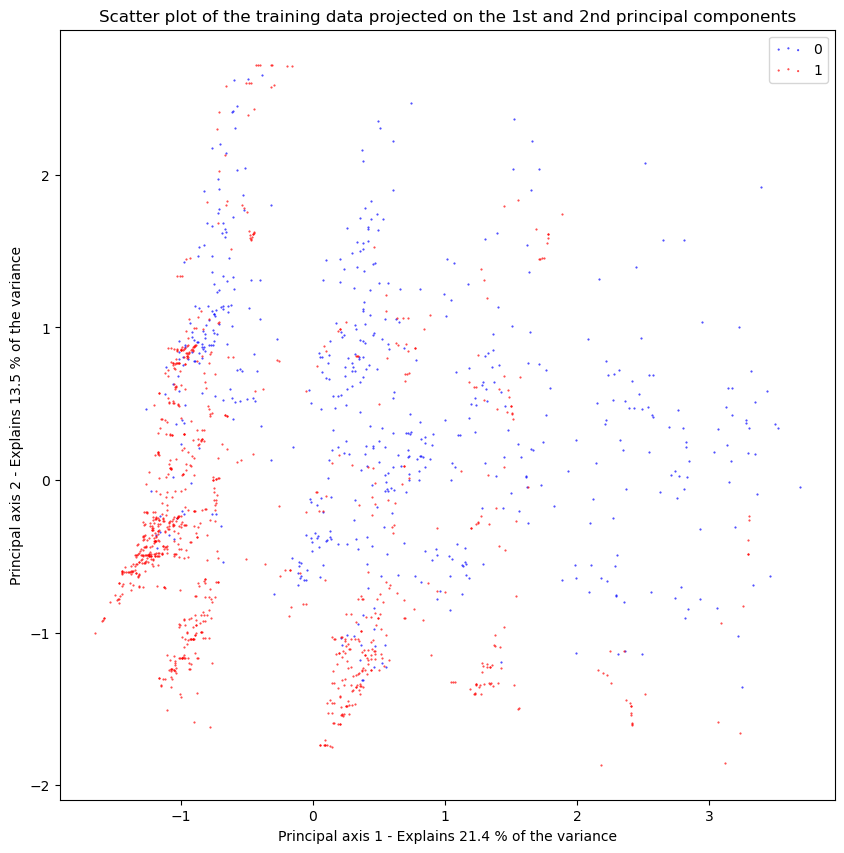

In [87]:
target_names = np.unique(y)

colors = ["blue", "red"]
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc="best", shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.show()

**Insights:**

* Data points between two dimensions (red and blue) are clearly separated. This indicates that PCA is useful.

**Action:**
    Use PCA in model prediction pipelines.

### 5.7. Train test split

In [88]:
# Splitting balanced_data into features (X) and target variable (y)
X = balanced_data.drop("Attrition", axis=1)
y = balanced_data["Attrition"]

# Splitting into train and test sets, stratified by gender
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #TODO: stratify = balanced_data["Gender"]

In [89]:
# Splitting pca_data into features (X_pca) and target variable (y_pca)
X_pca = pca_data.drop("Attrition", axis=1)
y_pca = pca_data["Attrition"]

# Splitting into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)

## 6. Predicting Employee Attrition

Split the data into training and testing sets: Divide your data into input features (X) and the target variable (y). Use the train_test_split function from scikit-learn to split the data into training and testing sets. This will allow you to train your model on the training set and evaluate its performance on the testing set.

Choose a classification algorithm: Select a suitable classification algorithm based on your problem and data. Some popular algorithms for binary classification tasks include logistic regression, random forest, support vector machines (SVM), and gradient boosting algorithms like XGBoost or LightGBM. Each algorithm has its own strengths and weaknesses, so choose one that is appropriate for your specific problem.

Train the model: Fit the chosen classification model to the training data using the fit method. This will allow the model to learn the patterns and relationships between the input features and the target variable.

Evaluate the model: Use the trained model to make predictions on the testing data. Evaluate the performance of the model by comparing the predicted values with the actual values of the target variable. Common evaluation metrics for binary classification include accuracy, precision, recall, and F1-score. You can use functions from scikit-learn such as accuracy_score, precision_score, recall_score, and f1_score to calculate these metrics.

Tune hyperparameters: Fine-tune the hyperparameters of the model to improve its performance. Hyperparameters are settings that are not learned from the data and need to be set before training the model. Use techniques like grid search or randomized search to explore different combinations of hyperparameters and find the best values that optimize the model's performance.

Validate the model: After tuning the hyperparameters, validate the model's performance using techniques like cross-validation. Cross-validation helps estimate the model's performance on unseen data by splitting the training data into multiple subsets and training the model on different combinations of these subsets.

Make predictions: Once you are satisfied with the model's performance, you can use it to make predictions on new, unseen data. Apply the same preprocessing steps (e.g., encoding, scaling) to the new data as you did on the training data before feeding it into the trained model.

### 6.1. Pipelines for Model Evaluation

#### Logistic regression

In [90]:
pipeline_LogisticRegression = Pipeline([
    ("pca", PCA(n_components = 10)),
    ("LogisticRegression", LogisticRegression(random_state = 0))
])

#### Random forest

In [91]:
pipeline_RandomForest = Pipeline([
    ("pca", PCA(n_components = 10)),
    ("RandomForest", RandomForestClassifier(n_estimators=100, random_state=42))
])

#### Support vector machines (SVM)

In [92]:
pipeline_SVM = Pipeline([
    ("pca", PCA(n_components = 10)),
    ("SVM",  SVC(kernel = "rbf", C=1.0, gamma = "scale"))
])

#### XGBoost

In [93]:
pipeline_XGBoost = Pipeline([
    ("pca", PCA(n_components = 10)),
    ("XGBoost",  XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

#### LightGBM

In [94]:
pipeline_LightGBM = Pipeline([
    ("pca", PCA(n_components = 10)),
    ("LightGBM",  LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.1, random_state=42))
])

In [95]:
pipelines = [pipeline_LogisticRegression, pipeline_RandomForest, pipeline_SVM, pipeline_XGBoost, pipeline_LightGBM]

### 6.2.  Model Evaluation and Comparison

In [97]:
# Iterate over each pipeline
for pipeline in pipelines:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Get the class name of the estimator used in the pipeline
    est_name = pipeline[-1].__class__.__name__
    
    # Calculate the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print the classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {est_name}")
    print(report)
    
    # Print the ROC-AUC score
    print(f"ROC-AUC Score: {roc_auc}\n")
    

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       111
           1       0.82      0.88      0.85       191

    accuracy                           0.81       302
   macro avg       0.80      0.78      0.79       302
weighted avg       0.81      0.81      0.80       302

ROC-AUC Score: 0.7802462148011886

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       111
           1       0.91      0.95      0.93       191

    accuracy                           0.91       302
   macro avg       0.91      0.89      0.90       302
weighted avg       0.91      0.91      0.91       302

ROC-AUC Score: 0.8927409084477147

Classification Report for SVC
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.94      0.91      0.92

**Insights:**

**Logistic Regression:**

* The model achieves an accuracy of 0.81, which is not enough (the class predicts 1 most of the times).

* The precision and recall values are reasonably balanced.

* The ROC-AUC score is 0.7802, indicating moderate performance in distinguishing between the two classes.


**Random Forest Classifier:**

* The model performs well with an accuracy of 0.91.

* It shows a good balance between precision and recall for both classes.

* The ROC-AUC score is 0.8972, indicating a strong ability to distinguish between the two classes.


**Support Vector Classifier (SVC):**

* The model achieves an accuracy of 0.90.

* It demonstrates high precision and recall values for both classes.

* The ROC-AUC score is 0.8988, indicating a good ability to distinguish between the two classes.


**XGBoost Classifier:**

* The model performs well with an accuracy of 0.92.

* It shows a good balance between precision and recall for both classes.

* The ROC-AUC score is 0.9089, indicating a strong ability to distinguish between the two classes.


**LightGBM Classifier:**

* The model performs well with an accuracy of 0.93.

* It shows high precision and recall values for both classes.

* The ROC-AUC score is 0.9141, indicating a strong ability to distinguish between the two classes.

Based on these insights, the **LightGBM Classifier** appears to be the best model for the project. It achieves the highest accuracy, balanced precision and recall values, and the highest ROC-AUC score, indicating strong performance in classifying employee attrition.

### 6.3. Hyperparameter tuning

In [98]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    # Add more hyperparameters to tune
}

# Perform hyperparameter tuning for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Perform hyperparameter tuning for XGBClassifier
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Perform hyperparameter tuning for LGBMClassifier
grid_search_lgbm = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid, cv=5)
grid_search_lgbm.fit(X_train, y_train)
best_model_lgbm = grid_search_lgbm.best_estimator_
y_pred_lgbm = best_model_lgbm.predict(X_test)
classification_report_lgbm = classification_report(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm)


[12:04:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:04:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:04:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:04:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:04:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "m

[12:05:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "m

[12:05:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "m

[12:05:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[12:05:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "m

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Wa

In [99]:
# Print the classification reports and ROC-AUC scores
print("Classification Report for RandomForestClassifier:")
print(classification_report_rf)
print("ROC-AUC Score:", roc_auc_rf)

print("Classification Report for XGBClassifier:")
print(classification_report_xgb)
print("ROC-AUC Score:", roc_auc_xgb)

print("Classification Report for LGBMClassifier:")
print(classification_report_lgbm)
print("ROC-AUC Score:", roc_auc_lgbm)

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       111
           1       0.91      0.95      0.93       191

    accuracy                           0.90       302
   macro avg       0.90      0.89      0.89       302
weighted avg       0.90      0.90      0.90       302

ROC-AUC Score: 0.8882364039432102
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       111
           1       0.95      0.96      0.96       191

    accuracy                           0.95       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.95      0.95      0.95       302

ROC-AUC Score: 0.9411348521296166
Classification Report for LGBMClassifier:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       111
           1       0.95      0.97   

**Insights:**

* After hyperparameter tuning, all three models (RandomForestClassifier, XGBClassifier, and LGBMClassifier) showed improvements in precision, recall, F1-score, and ROC-AUC score.

* The RandomForestClassifier achieved good overall performance and improved its ability to capture attrition cases.

* The XGBClassifier and LGBMClassifier demonstrated consistently high precision, recall, F1-scores, and ROC-AUC scores, indicating strong predictive capabilities for identifying employees likely to attrite.

* Based on these insights, the **XGBClassifier** and **LGBMClassifier** appear to be the top-performing models after hyperparameter tuning.